DONE


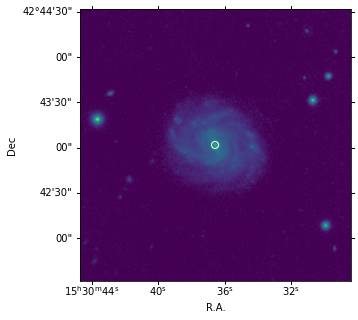

In [70]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import os.path
from os import path
from scipy.ndimage import gaussian_filter
from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

from astroquery.skyview import SkyView #You might need to install astroquery, other libraries are standard

from collections import Counter


def header_columns(filename,column):
    COMMENT_CHAR = '#'
    col_NAME = []
    with open(filename, 'r') as td:
        for line in td:
            if line[0] == COMMENT_CHAR:
                info = re.split(' +', line.rstrip('\n'))
                col_NAME.append(info[column])
    counts = {k:v for k,v in Counter(col_NAME).items() if v > 1}
    col_NAME_NEW = col_NAME[:]
    for i in reversed(range(len(col_NAME))):
        item = col_NAME[i]
        if item in counts and counts[item]:
            if (counts[item]>1):
                col_NAME_NEW[i] += str(counts[item]-1)
            counts[item]-=1                
    return col_NAME_NEW



def header_columns_old_pd(filename,column):
    COMMENT_CHAR = '#'
    col_NAME = []
    with open(filename, 'r') as td:
        for line in td:
            if line[0] == COMMENT_CHAR:
                info = re.split(' +', line.rstrip('\n'))
                col_NAME.append(info[column])
    return col_NAME

import image_registration as imre

from image_registration import chi2_shift
from image_registration.fft_tools import shift
from reproject import reproject_interp
from astropy.units import Quantity
from astropy import units as u

imrad2 = Quantity(3.0,unit=u.arcmin)

filename = 'NGC5947_PS_g.fits'
hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)
fig,ax = plt.subplots(figsize=(10,5))
ax=plt.subplot(projection=wcs)
ax.imshow(hdu.data, vmin=-2.e-5, vmax=10, origin='lower')
ax.scatter(232.652436800918,42.7171665852056, transform=ax.get_transform('fk5'), s=50,
            edgecolor='white', facecolor='none')

plt.xlabel('R.A.')
plt.ylabel('Dec')
print("DONE")


#filename_PS = 'NGC5947_PS_g.fits'
#hdu = fits.open(filename_PS)[0]

list_images=SkyView.get_image_list(position='232.652436800918 42.7171665852056',
                                   survey=['DSS2 Red'])
print(list_images)

imrad2 = Quantity(3.0,unit=u.arcmin)
#hdu = SkyView.get_images(position='232.652436800918 42.7171665852056', survey=['DSS1 Red'], radius = imrad2)
hdu = SkyView.get_images(position='232.652436800918 42.7171665852056', survey=['DSS2 Red'], radius = imrad2)
#hdu = SkyView.get_images(position='232.652436800918 42.7171665852056', survey=['CFHTLS-D-r'], radius = imrad2)
#hdu = SkyView.get_images(position='232.652436800918 42.7171665852056', survey=['SDSSr'], radius = imrad2)
hdu=hdu[0][0] #CFHTLS-W-r
mean=np.mean(hdu.data)
stddev=np.std(hdu.data)
print('stats = ',mean,' ',stddev)
hdu.writeto('test.fits.gz',overwrite=True)
wcs = WCS(hdu.header)
fig,ax = plt.subplots(figsize=(10,5))
ax=plt.subplot(projection=wcs)
#ax.imshow(hdu.data, vmin=-2.e-5, vmax=25000, origin='lower')
ax.imshow(hdu.data, vmin=(-0.1)*stddev, vmax=15*mean, origin='lower')
ax.scatter(232.652436800918,42.7171665852056, transform=ax.get_transform('fk5'), s=50,
            edgecolor='white', facecolor='none')

plt.xlabel('R.A.')
plt.ylabel('Dec')
print("DONE")


<ipython-input-71-b30e46bdd32c>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot(projection=wcs)
<ipython-input-71-b30e46bdd32c>:9: RuntimeWarning: divide by zero encountered in log10
  ax.imshow(np.log10(hdu.data), vmin=-3, vmax=0.3, origin='lower')
<ipython-input-71-b30e46bdd32c>:9: RuntimeWarning: invalid value encountered in log10
  ax.imshow(np.log10(hdu.data), vmin=-3, vmax=0.3, origin='lower')


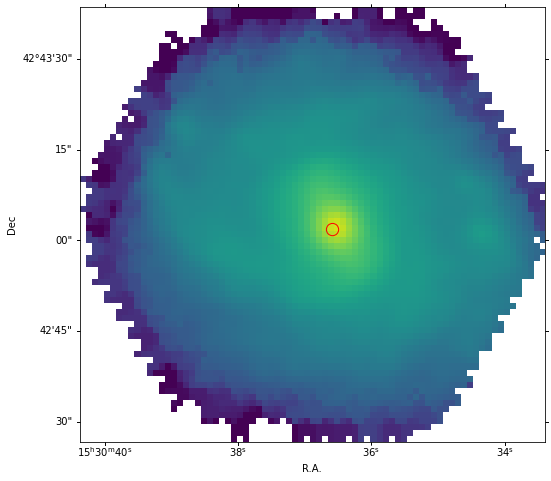

In [71]:
filename = 'map.r.NGC5947.fits.gz'
hdu = fits.open(filename)[0]
data=hdu.data
wcs.wcs.crpix = [42.5,35.5]
wcs.wcs.cdelt = np.array([-1/3600,1/3600])
fig,ax = plt.subplots(figsize=(14,8))
ax=plt.subplot(projection=wcs)
ax=plt.subplot(projection=wcs)
ax.imshow(np.log10(hdu.data), vmin=-3, vmax=0.3, origin='lower')
ax.scatter(232.652436800918,42.7171665852056, transform=ax.get_transform('fk5'), s=150,
            edgecolor='red', facecolor='none')

plt.xlabel('R.A.')
plt.ylabel('Dec')
#print("DONE")


this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
<ipython-input-72-d363da453090>:27: RuntimeWarning: divide by zero encountered in log10
  ax2.imshow(np.log10(hdu.data), cmap='gray_r', vmin=-3, vmax=0.15, origin='lower')
<ipython-input-72-d363da453090>:27: RuntimeWarning: invalid value encountered in log10
  ax2.imshow(np.log10(hdu.data), cmap='gray_r', vmin=-3, vmax=0.15, origin='lower')


WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 232.94116210939  41.999999999999  
CRPIX : 42.5  35.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00027777777777778  0.00027777777777778  
NAXIS : 77  72

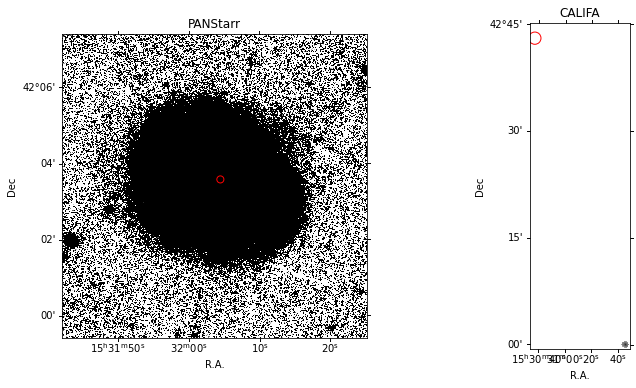

In [72]:

name='NGC5947'
filename_PS = name+'_PS_warp_g.fits'
xc_PS=248.526778723309
yc_PS=249.418413876343
RA_PS=232.652436800918
DEC_PS=42.7171665852056
xc_cal=42.5
yc_cal=35.5
filename_cal = 'map.r.'+name+'.fits.gz'
fname="astro_"+name+".pdf"

hdu_PS = fits.open(filename_PS)[0]
wcs = WCS(hdu_PS.header)
fig=plt.figure(figsize=(12,6))
gs = fig.add_gridspec(1,2)
ax=fig.add_subplot(gs[0],projection=wcs)
ax.imshow(hdu_PS.data,  cmap='gray_r',vmin=-2.e-5, vmax=5, origin='lower')
ax.set_title('PANStarr')
ax.set_xlabel('R.A.')
ax.set_ylabel('Dec')
ax.scatter(xc_PS,yc_PS, s=50, edgecolor='red', facecolor='none')
hdu = fits.open(filename_cal)[0]
wcs_cal = WCS(hdu.header)
wcs.wcs.crpix = [xc_cal,yc_cal]
wcs.wcs.cdelt = np.array([-1/3600,1/3600])
ax2=fig.add_subplot(gs[1],projection=wcs)
ax2.imshow(np.log10(hdu.data), cmap='gray_r', vmin=-3, vmax=0.15, origin='lower')
ax2.scatter(RA_PS, DEC_PS, transform=ax2.get_transform('fk5'), s=150,
            edgecolor='red', facecolor='none')
ax2.set_title('CALIFA')
ax2.set_xlabel('R.A.')
ax2.set_ylabel('Dec')
fig.savefig(fname,dpi=150)

#wcs
(nx,ny)=hdu.data.shape
wcs_cal = WCS(naxis=2)

# Set up an "Airy's zenithal" projection
# Vector properties may be set with Python lists, or Numpy arrays
#hdu.header.naxis=2
wcs_cal.wcs.crpix = [xc_cal,yc_cal]
wcs_cal.wcs.cdelt = np.array([-1/3600,1/3600])
wcs_cal.wcs.crval = wcs.wcs.crval
wcs_cal.wcs.ctype = ["RA---TAN", "DEC--TAN"]
hdu.header=wcs_cal.to_header()
wcs_cal_out=WCS(hdu.header)
wcs_cal_out
#wcs_cal.wcs.set_pv([(2, 1, 45.0)])


In [73]:
#SkyView.list_surveys()

In [74]:
def plot_astr_points(name='NGC5947', ext='pdf', xc_PS=248.526778723309, yc_PS=249.418413876343, RA_PS=232.652436800918, DEC_PS=42.7171665852056, xc_cal=42.5, yc_cal=35.5):
    filename_PS = name+'_PS_r.fits'
    filename_cal = 'map.r.'+name+'.fits.gz'
    if ((path.exists(filename_PS)) and (path.exists(filename_cal))):
        fname="astro_"+name+"."+ext
        hdu_PS = fits.open(filename_PS)[0]
        wcs_copy = WCS(hdu_PS.header)
        fig=plt.figure(figsize=(12,6))
        gs = fig.add_gridspec(1,2)
        ax=fig.add_subplot(gs[0],projection=wcs_copy)
        ax.imshow(hdu_PS.data, cmap='gray_r',vmin=-2.e-5, vmax=5, origin='lower')
        ax.set_title('PANStarr')
        ax.set_xlabel('R.A.')
        ax.set_ylabel('Dec')
        ax.scatter(wcs_copy.wcs.crpix[0], wcs_copy.wcs.crpix[1], s=50, edgecolor='red', facecolor='none')
        ax.scatter(xc_PS,yc_PS, s=50,  edgecolor='blue', facecolor='blue')

        wcs = WCS(hdu_PS.header)
        #    ax.scatter(251.0, 251.0, s=15, edgecolor='blue', facecolor='blue')
        #    ax.scatter(wcs.wcs.crpix[0], wcs.wcs.crpix[1], s=15, edgecolor='blue', facecolor='blue')
        #    ax.scatter(xc_PS,yc_PS, s=50, edgecolor='red', facecolor='none')
        #d_xc_PS=0 #(251.0-xc_PS)*wcs.wcs.cdelt[0]
        #d_yc_PS=0 #(251.0-yc_PS)*wcs.wcs.cdelt[1]
        hdu = fits.open(filename_cal)[0]
        wcs.wcs.crpix = [xc_cal+1,yc_cal+1]
        wcs.wcs.cdelt = np.array([-1/3600,1/3600])
        #wcs.wcs.crval = [RA_PS+d_xc_PS, DEC_PS+d_yc_PS]
        wcs.wcs.crval = [RA_PS, DEC_PS]
        ax2=fig.add_subplot(gs[1],projection=wcs)
        ax2.imshow(np.log10(hdu.data), cmap='gray_r', vmin=-3, vmax=0.15, origin='lower')
        ax2.scatter(wcs_copy.wcs.crval[0], wcs_copy.wcs.crval[1], transform=ax2.get_transform('fk5'), s=150,
                    edgecolor='red', facecolor='none')
        ax2.scatter(xc_cal, yc_cal, s=70, marker="s", edgecolor='white', facecolor='white')
        #    ax2.scatter(RA_PS+d_xc_PS, DEC_PS+d_yc_PS, s=30, transform=ax2.get_transform('fk5'),  edgecolor='blue', facecolor='blue')
        ax2.scatter(RA_PS, DEC_PS, s=30, transform=ax2.get_transform('fk5'),  edgecolor='blue', facecolor='blue')
        ax2.set_title('CALIFA: '+name)
        ax2.set_xlabel('R.A.')
        ax2.set_ylabel('Dec')
        fig.savefig(fname,dpi=150)
        print(name, xc_PS, yc_PS, RA_PS, DEC_PS, xc_cal, yc_cal)
    else:
        print("Fits files dones not exists for galaxy "+name)
    print(wcs_copy.wcs.crval)
    print(wcs_copy.wcs.crpix)        

def plot_astr_working(name='NGC5947', ext='pdf', xc_PS=248.526778723309, yc_PS=249.418413876343, RA_PS=232.652436800918, DEC_PS=42.7171665852056, xc_cal=42.5, yc_cal=35.5):
    filename_PS = name+'_PS_r.fits'
    filename_cal = 'map.r.'+name+'.fits.gz'
    if ((path.exists(filename_PS)) and (path.exists(filename_cal))):
        fname="astro_"+name+"."+ext
        hdu_PS = fits.open(filename_PS)[0]
        wcs_copy = WCS(hdu_PS.header)
        fig=plt.figure(figsize=(12,6))
        gs = fig.add_gridspec(1,2)
        ax=fig.add_subplot(gs[0],projection=wcs_copy)
        ax.imshow(hdu_PS.data, cmap='gray_r',vmin=-2.e-5, vmax=5, origin='lower')
        ax.set_title('PANStarr')
        ax.set_xlabel('R.A.')
        ax.set_ylabel('Dec')
        ax.scatter(xc_PS,yc_PS, s=15,  edgecolor='blue', facecolor='blue')
        wcs = WCS(hdu_PS.header)
        hdu = fits.open(filename_cal)[0]
        crpix1_cal=np.int(xc_cal)+1
        crpix2_cal=np.int(yc_cal)+1
        d_crval1=((xc_cal+1)-crpix1_cal)/3600.0
        d_crval2=((yc_cal+1)-crpix2_cal)/3600.0
        crval1_cal=RA_PS+d_crval1
        crval2_cal=DEC_PS-d_crval2        
        wcs.wcs.crpix = [crpix1_cal,crpix2_cal]
        wcs.wcs.cdelt = np.array([-1/3600,1/3600])
        wcs.wcs.crval = [crval1_cal, crval2_cal]


        ax2=fig.add_subplot(gs[1],projection=wcs)
        ax2.imshow(np.log10(hdu.data), cmap='gray_r', vmin=-3, vmax=0.15, origin='lower')
#        ax2.scatter(wcs_copy.wcs.crval[0], wcs_copy.wcs.crval[1], transform=ax2.get_transform('fk5'), s=150,
#                    edgecolor='red', facecolor='none')
#        ax2.contour(hdu_PS.data, levels=np.logspace(0.05, 0.5, 5), colors='red', alpha=0.5, transform=ax2.get_transform(WCS(hdu_PS.header)))
        ax2.contour(hdu_PS.data, levels=np.linspace(1, 5, 5), colors='red', alpha=0.5, transform=ax2.get_transform(WCS(hdu_PS.header)))
        ax2.scatter(xc_cal, yc_cal, s=20, edgecolor='white', facecolor='white')
        #    ax2.scatter(RA_PS+d_xc_PS, DEC_PS+d_yc_PS, s=30, transform=ax2.get_transform('fk5'),  edgecolor='blue', facecolor='blue')
        ax2.scatter(RA_PS, DEC_PS, s=10, transform=ax2.get_transform('fk5'),  edgecolor='blue', facecolor='blue')
        ax2.set_title('CALIFA: '+name)
        ax2.set_xlabel('R.A.')
        ax2.set_ylabel('Dec')
#        ax2.set_xlim(-0.5, hdu.data.shape[1] - 0.5)
#        ax2.set_ylim(-0.5, hdu.data.shape[0] - 0.5)

        ax2.set_xlim(-0.5, hdu.data.shape[1] - 0.5)
        ax2.set_ylim(-0.5, hdu.data.shape[0] - 0.5)

        ax.contour(hdu.data, levels=np.logspace(-2, 0.15, 5), colors='red', alpha=0.5, transform=ax.get_transform(wcs))
        ax.set_xlim(-0.5, hdu_PS.data.shape[1] - 0.5)
        ax.set_ylim(-0.5, hdu_PS.data.shape[0] - 0.5)

        fig.savefig(fname,dpi=150)
        print(name, xc_PS, yc_PS, RA_PS, DEC_PS, xc_cal, yc_cal)
    else:
        print("Fits files dones not exists for galaxy "+name)
    print(wcs_copy.wcs.crval)
    print(wcs_copy.wcs.crpix)        

def plot_astr_just_plot(name='NGC5947', ext='pdf', xc_PS=248.526778723309, yc_PS=249.418413876343, RA_PS=232.652436800918, DEC_PS=42.7171665852056, xc_cal=42.5, yc_cal=35.5):
    filename_PS = name+'_PS_r.fits'
    filename_cal = 'map.r.'+name+'.fits.gz'
    if ((path.exists(filename_PS)) and (path.exists(filename_cal))):
        fname="astro_"+name+"."+ext
        hdu_PS = fits.open(filename_PS)[0]
        wcs_copy = WCS(hdu_PS.header)
        fig=plt.figure(figsize=(18,6))
        gs = fig.add_gridspec(1,3)
        ax=fig.add_subplot(gs[0],projection=wcs_copy)
        ax.imshow(hdu_PS.data, cmap='gray_r',vmin=-2.e-5, vmax=5, origin='lower')
        ax.set_title('PANStarr')
        ax.set_xlabel('R.A.')
        ax.set_ylabel('Dec')
        ax.scatter(xc_PS,yc_PS, s=15,  edgecolor='blue', facecolor='blue')
        wcs = WCS(hdu_PS.header)
        hdu = fits.open(filename_cal)[0]
        crpix1_cal=np.int(xc_cal)+1
        crpix2_cal=np.int(yc_cal)+1
        d_crval1=((xc_cal+1)-crpix1_cal)/3600.0
        d_crval2=((yc_cal+1)-crpix2_cal)/3600.0
        crval1_cal=RA_PS+d_crval1
        crval2_cal=DEC_PS-d_crval2        
        #
        # Update the header with the new wcs!
        #
        (nx,ny)=hdu.data.shape
        wcs_cal = WCS(naxis=2)
        wcs_cal.wcs.crpix = [crpix1_cal,crpix2_cal]
        wcs_cal.wcs.cdelt = np.array([-1/3600,1/3600])
        wcs_cal.wcs.crval = [crval1_cal, crval2_cal]
        wcs_cal.wcs.ctype = ["RA---TAN", "DEC--TAN"]
        hdu.header=wcs_cal.to_header()
        #
        #
        #
        img_PS_to_CAL, footprint_PS_to_CAL = reproject_interp(hdu_PS, hdu.header)
        ax3=fig.add_subplot(gs[2],projection=wcs_cal)
        ax3.imshow(img_PS_to_CAL, cmap='gray_r',vmin=-2.e-5, vmax=5, origin='lower')
        
        ax2=fig.add_subplot(gs[1],projection=wcs_cal)
        ax2.imshow(np.log10(hdu.data), cmap='gray_r', vmin=-3, vmax=0.15, origin='lower')
#        ax2.scatter(wcs_copy.wcs.crval[0], wcs_copy.wcs.crval[1], transform=ax2.get_transform('fk5'), s=150,
#                    edgecolor='red', facecolor='none')
#        ax2.contour(hdu_PS.data, levels=np.logspace(0.05, 0.5, 5), colors='red', alpha=0.5, transform=ax2.get_transform(WCS(hdu_PS.header)))
        ax2.contour(hdu_PS.data, levels=np.linspace(1, 5, 5), colors='red', alpha=0.5, transform=ax2.get_transform(WCS(hdu_PS.header)))
        ax2.scatter(xc_cal, yc_cal, s=20, edgecolor='white', facecolor='white')
        #    ax2.scatter(RA_PS+d_xc_PS, DEC_PS+d_yc_PS, s=30, transform=ax2.get_transform('fk5'),  edgecolor='blue', facecolor='blue')
        ax2.scatter(RA_PS, DEC_PS, s=10, transform=ax2.get_transform('fk5'),  edgecolor='blue', facecolor='blue')
        ax2.set_title('CALIFA: '+name)
        ax2.set_xlabel('R.A.')
#        ax2.set_ylabel('Dec')
#        ax2.set_xlim(-0.5, hdu.data.shape[1] - 0.5)
#        ax2.set_ylim(-0.5, hdu.data.shape[0] - 0.5)

        ax2.set_xlim(-0.5, hdu.data.shape[1] - 0.5)
        ax2.set_ylim(-0.5, hdu.data.shape[0] - 0.5)

        ax.contour(hdu.data, levels=np.logspace(-2, 0.15, 5), colors='red', alpha=0.5, transform=ax.get_transform(wcs_cal))
        ax3.contour(hdu.data, levels=np.logspace(-2, 0.15, 5), colors='red', alpha=0.5, transform=ax3.get_transform(wcs_cal))
        ax3.scatter(RA_PS, DEC_PS, s=10, transform=ax3.get_transform('fk5'),  edgecolor='blue', facecolor='blue')
        ax3.set_title('PS resampled to CALIFA: '+name)
        ax3.set_xlabel('R.A.')
#        ax3.set_ylabel('Dec')

        ax.set_xlim(-0.5, hdu_PS.data.shape[1] - 0.5)
        ax.set_ylim(-0.5, hdu_PS.data.shape[0] - 0.5)

        fig.savefig(fname,dpi=150)
        
#        print(name, xc_PS, yc_PS, RA_PS, DEC_PS, xc_cal, yc_cal)
    else:
        print("Fits files dones not exists for galaxy "+name)
#    print(wcs_copy.wcs.crval)
#    print(wcs_copy.wcs.crpix)


def plot_astr_hips(name='NGC5947', ext='pdf', xc_PS=248.526778723309, yc_PS=249.418413876343, RA_PS=232.652436800918, DEC_PS=42.7171665852056, xc_cal=42.5, yc_cal=35.5):
    filename_PS = name+'_PS_r.fits'
    filename_cal = 'map.r.'+name+'.fits.gz'
    if ((path.exists(filename_PS)) and (path.exists(filename_cal))):
        fname="astro_"+name+"."+ext
        hdu_PS = fits.open(filename_PS)[0]
#        if (filename_PS.find("_PS_")):
#            print('photometric correction')
#            cor_data=np.sinh(hdu_PS.data)/32
        wcs_copy = WCS(hdu_PS.header)
        print(f'CDELT_ORG = {wcs_copy.wcs.cdelt}')
        fig=plt.figure(figsize=(15,8))
        gs = fig.add_gridspec(2,3)
        ax=fig.add_subplot(gs[0,0],projection=wcs_copy)
        ax.imshow(hdu_PS.data, cmap='gray_r',vmin=-2.e-5, vmax=5, origin='lower')
        ax.set_title('PANStarr')
        ax.set_xlabel('R.A.')
        ax.set_ylabel('Dec')
        ax.scatter(xc_PS,yc_PS, s=15,  edgecolor='blue', facecolor='blue')
        wcs = WCS(hdu_PS.header)
        hdu = fits.open(filename_cal)[0]
        crpix1_cal=np.int(xc_cal)+1
        crpix2_cal=np.int(yc_cal)+1
        d_crval1=((xc_cal+1)-crpix1_cal)/3600.0
        d_crval2=((yc_cal+1)-crpix2_cal)/3600.0
        crval1_cal=RA_PS+d_crval1
        crval2_cal=DEC_PS-d_crval2        
        #
        # Update the header with the new wcs!
        #
        (nx,ny)=hdu.data.shape
        wcs_cal = WCS(naxis=2)
        wcs_cal.wcs.crpix = [crpix1_cal,crpix2_cal]
        wcs_cal.wcs.cdelt = np.array([-1/3600,1/3600])
        wcs_cal.wcs.crval = [crval1_cal, crval2_cal]
        wcs_cal.wcs.ctype = ["RA---TAN", "DEC--TAN"]
        hdu.header=wcs_cal.to_header()
        #
        #
        #        
        img_PS_to_CAL, footprint_PS_to_CAL = reproject_interp(hdu_PS, hdu.header)
        ax3=fig.add_subplot(gs[1,0],projection=wcs_cal)
        ax3.imshow(img_PS_to_CAL, cmap='gray_r',vmin=-2.e-5, vmax=5, origin='lower')
        
        ax2=fig.add_subplot(gs[0,1],projection=wcs_cal)
        ax2.imshow(np.log10(hdu.data), cmap='gray_r', vmin=-3, vmax=0.15, origin='lower')
        ax2.contour(hdu_PS.data, levels=np.linspace(1, 5, 5), colors='red', alpha=0.5, transform=ax2.get_transform(WCS(hdu_PS.header)))
        ax2.scatter(xc_cal, yc_cal, s=20, edgecolor='white', facecolor='white')
        ax2.scatter(RA_PS, DEC_PS, s=10, transform=ax2.get_transform('fk5'),  edgecolor='blue', facecolor='blue')
        ax2.set_title('CALIFA: '+name)
        ax2.set_xlabel('R.A.')
        ax2.set_xlim(-0.5, hdu.data.shape[1] - 0.5)
        ax2.set_ylim(-0.5, hdu.data.shape[0] - 0.5)

        ax.contour(hdu.data, levels=np.logspace(-2, 0.15, 5), colors='red', alpha=0.5, transform=ax.get_transform(wcs_cal))
        ax3.contour(hdu.data, levels=np.logspace(-2, 0.15, 5), colors='red', alpha=0.5, transform=ax3.get_transform(wcs_cal))
        ax3.scatter(RA_PS, DEC_PS, s=10, transform=ax3.get_transform('fk5'),  edgecolor='blue', facecolor='blue')
        ax3.set_title('PS resampled to CALIFA: '+name)
        ax3.set_xlabel('R.A.')
        ax3.set_ylabel('Dec')

        ax.set_xlim(-0.5, hdu_PS.data.shape[1] - 0.5)
        ax.set_ylim(-0.5, hdu_PS.data.shape[0] - 0.5)
        print("IN= ",crval1_cal,crval2_cal)
        for i in range(5):
            #
            # We extract a slice of the image
            #
            img_PS_to_CAL_input, footprint_PS_to_CAL = reproject_interp(hdu_PS, hdu.header)
            #img_PS_to_CAL, footprint_PS_to_CAL = reproject_interp(hdu_PS, hdu.header)
            #
            # We match the PSFs somehow
            #
            img_PS_to_CAL=gaussian_filter(img_PS_to_CAL_input, sigma=0.5)
            #img_PS_to_CAL=img_PS_to_CAL*(hdu.data/hdu.data)
            
            xoff, yoff, exoff, eyoff = chi2_shift(img_PS_to_CAL, hdu.data, 0.3,
                                                  return_error=True, upsample_factor='auto')
            print('Offsets (',i,'):  x= ',xoff,'+-',exoff,' y= ',yoff,'+-',eyoff)
        
            #        hdu_corr = fits.PrimaryHDU(data=header=header)
            
            crval1_cal=crval1_cal-xoff*(-1/3600)
            crval2_cal=crval2_cal-yoff*(1/3600)
            wcs_cal.wcs.crval = [crval1_cal, crval2_cal]
            hdu.header=wcs_cal.to_header()
        print("OUT = ",crval1_cal,crval2_cal)
        #wcs_cal = WCS(hdu.header)    
        ax.contour(hdu.data, levels=np.logspace(-2, 0.15, 5), colors='blue', alpha=0.25, transform=ax.get_transform(wcs_cal))
#        ax2.contour(hdu.data, levels=np.logspace(-2, 0.15, 5), colors='blue', alpha=0.25, transform=ax2.get_transform(wcs_cal))
#        ax3.contour(hdu.data, levels=np.logspace(-2, 0.15, 5), colors='blue', alpha=0.25, transform=ax3.get_transform(wcs_cal))
        ax4=fig.add_subplot(gs[1,1],projection=wcs_cal)
        ax4.imshow(np.log10(hdu.data), cmap='gray_r', vmin=-3, vmax=0.25, origin='lower')
        ax4.contour(hdu_PS.data, levels=np.linspace(1, 5, 5), colors='blue', alpha=0.5, transform=ax4.get_transform(WCS(hdu_PS.header)))
        ax4.scatter(xc_cal, yc_cal, s=20, edgecolor='white', facecolor='white')
        ax4.scatter(RA_PS, DEC_PS, s=10, transform=ax4.get_transform('fk5'),  edgecolor='blue', facecolor='blue')
        ax4.set_title('WCS registration'+name)
        ax4.set_xlabel('R.A.')
        ax4.set_xlim(-0.5, hdu.data.shape[1] - 0.5)
        ax4.set_ylim(-0.5, hdu.data.shape[0] - 0.5)

        if (filename_PS.find("_PS_")):
            print('photometric correction')
            pix_rat = np.abs(wcs_copy.wcs.cdelt[0]/(1/3600))
            print(f'pix_rat = {pix_rat}')
            rat_data=hdu.data/(np.sinh(img_PS_to_CAL)/32)/(pix_rat)#/hdu.data
#            rat_data=hdu.data/(np.sinh(img_PS_to_CAL)/32)/(pix_rat)#/hdu.data
#            rat_data=(hdu.data/img_PS_to_CAL)#/(pix_rat**2)#/hdu.data
            mask_data= (hdu.data>0.25)
            rat_mean=np.nanmean(rat_data[mask_data])
            rat_std=np.nanstd(rat_data[mask_data])
            print(f'rat = {rat_mean}+-{rat_std}')
            ax5=fig.add_subplot(gs[0,2])
            ax5.scatter(hdu.data[mask_data],rat_data[mask_data])
       
        
        fig.savefig(fname,dpi=150)
        return (crval1_cal,crval2_cal,crpix1_cal,crpix2_cal)
#        print(name, xc_PS, yc_PS, RA_PS, DEC_PS, xc_cal, yc_cal)
    else:
        print("Fits files dones not exists for galaxy "+name)
#    print(wcs_copy.wcs.crval)
#    print(wcs_copy.wcs.crpix)


def plot_astr(name='NGC5947', ext='pdf', xc_PS=248.526778723309, yc_PS=249.418413876343, RA_PS=232.652436800918, DEC_PS=42.7171665852056, xc_cal=42.5, yc_cal=35.5):
    #
    # We download the files from the Astroquery
    #

    imrad2 = Quantity(3.0,unit=u.arcmin)
    filename_PS = name+'.sdss_r.fits'
    if (~(path.exists(filename_PS))):
        filename_PS = name+'.dss2_r.fits'
        if (~(path.exists(filename_PS))):
            filename_PS = name+'.sdss_r.fits'
            #hdu = SkyView.get_images(position='232.652436800918 42.7171665852056', survey=['DSS1 Red'], radius = imrad2)
            #hdu = SkyView.get_images(position='232.652436800918 42.7171665852056', survey=['DSS2 Red'], radius = imrad2)
            #hdu = SkyView.get_images(position='232.652436800918 42.7171665852056', survey=['CFHTLS-D-r'], radius = imrad2)
#            hdu_PS = SkyView.get_images(position=str(RA_PS)+' '+str(DEC_PS), survey=['SDSSr'], radius = imrad2)
#            get_list_PS = SkyView.get_image_list(position=str(RA_PS)+' '+str(DEC_PS), survey=['SDSSr'], radius = imrad2)
#            print('get_list_PS = ',get_list_PS)

            try:
                hdu_PS = SkyView.get_images(position=str(RA_PS)+' '+str(DEC_PS), survey=['SDSSr'], radius = imrad2)
            except ValueError:
                mean='nan'
                stddev=0
            hdu_PS=hdu_PS[0][0] #CFHTLS-W-r
            mean=np.mean(hdu_PS.data)
            stddev=np.std(hdu_PS.data)

            print('stats SDSS= ',mean,' ',stddev)
            if (~(np.isnan(mean))):
                hdu_PS.writeto(filename_PS,overwrite=True)
            else:
                hdu_PS = SkyView.get_images(position=str(RA_PS)+' '+str(DEC_PS), survey=['DSS2 Red'], radius = imrad2)
                hdu_PS=hdu_PS[0][0] #CFHTLS-W-r
                mean=np.mean(hdu_PS.data)
                stddev=np.std(hdu_PS.data)
                print('stats DSS= ',mean,' ',stddev)
                hdu_PS.writeto(filename_PS,overwrite=True)
        else:
            hdu_PS = fits.open(filename_PS)[0]            
    else:
        hdu_PS = fits.open(filename_PS)[0]            
    
    filename_cal = 'map.r.'+name+'.fits.gz'
    if ((path.exists(filename_PS)) and (path.exists(filename_cal))):
        fname="astro_"+name+"."+ext
        wcs_copy = WCS(hdu_PS.header)
        fig=plt.figure(figsize=(8,8))
        gs = fig.add_gridspec(2,2)
        ax=fig.add_subplot(gs[0,0],projection=wcs_copy)
        ax.imshow(hdu_PS.data, cmap='gray_r',vmin=-2.e-5, vmax=5, origin='lower')
        ax.set_title('PANStarr')
        ax.set_xlabel('R.A.')
        ax.set_ylabel('Dec')
        ax.scatter(xc_PS,yc_PS, s=15,  edgecolor='blue', facecolor='blue')
        wcs = WCS(hdu_PS.header)
        hdu = fits.open(filename_cal)[0]
        crpix1_cal=np.int(xc_cal)+1
        crpix2_cal=np.int(yc_cal)+1
        d_crval1=((xc_cal+1)-crpix1_cal)/3600.0
        d_crval2=((yc_cal+1)-crpix2_cal)/3600.0
        crval1_cal=RA_PS+d_crval1
        crval2_cal=DEC_PS-d_crval2        
        #
        # Update the header with the new wcs!
        #
        (nx,ny)=hdu.data.shape
        wcs_cal = WCS(naxis=2)
        wcs_cal.wcs.crpix = [crpix1_cal,crpix2_cal]
        wcs_cal.wcs.cdelt = np.array([-1/3600,1/3600])
        wcs_cal.wcs.crval = [crval1_cal, crval2_cal]
        wcs_cal.wcs.ctype = ["RA---TAN", "DEC--TAN"]
        hdu.header=wcs_cal.to_header()
        #
        #
        #        
        img_PS_to_CAL, footprint_PS_to_CAL = reproject_interp(hdu_PS, hdu.header)
        ax3=fig.add_subplot(gs[1,0],projection=wcs_cal)
        ax3.imshow(img_PS_to_CAL, cmap='gray_r',vmin=-2.e-5, vmax=5, origin='lower')
        
        ax2=fig.add_subplot(gs[0,1],projection=wcs_cal)
        ax2.imshow(np.log10(hdu.data), cmap='gray_r', vmin=-3, vmax=0.15, origin='lower')
        ax2.contour(hdu_PS.data, levels=np.linspace(1, 5, 5), colors='red', alpha=0.5, transform=ax2.get_transform(WCS(hdu_PS.header)))
        ax2.scatter(xc_cal, yc_cal, s=20, edgecolor='white', facecolor='white')
        ax2.scatter(RA_PS, DEC_PS, s=10, transform=ax2.get_transform('fk5'),  edgecolor='blue', facecolor='blue')
        ax2.set_title('CALIFA: '+name)
        ax2.set_xlabel('R.A.')
        ax2.set_xlim(-0.5, hdu.data.shape[1] - 0.5)
        ax2.set_ylim(-0.5, hdu.data.shape[0] - 0.5)

        ax.contour(hdu.data, levels=np.logspace(-2, 0.15, 5), colors='red', alpha=0.5, transform=ax.get_transform(wcs_cal))
        ax3.contour(hdu.data, levels=np.logspace(-2, 0.15, 5), colors='red', alpha=0.5, transform=ax3.get_transform(wcs_cal))
        ax3.scatter(RA_PS, DEC_PS, s=10, transform=ax3.get_transform('fk5'),  edgecolor='blue', facecolor='blue')
        ax3.set_title('PS resampled to CALIFA: '+name)
        ax3.set_xlabel('R.A.')
        ax3.set_ylabel('Dec')

        ax.set_xlim(-0.5, hdu_PS.data.shape[1] - 0.5)
        ax.set_ylim(-0.5, hdu_PS.data.shape[0] - 0.5)
        print("IN= ",crval1_cal,crval2_cal)
        for i in range(5):
            #
            # We extract a slice of the image
            #
            img_PS_to_CAL_input, footprint_PS_to_CAL = reproject_interp(hdu_PS, hdu.header)
            #img_PS_to_CAL, footprint_PS_to_CAL = reproject_interp(hdu_PS, hdu.header)
            #
            # We match the PSFs somehow
            #
            #img_PS_to_CAL=gaussian_filter(img_PS_to_CAL_input, sigma=0.5)
            img_PS_to_CAL=gaussian_filter(img_PS_to_CAL_input, sigma=1.0)
            #img_PS_to_CAL=img_PS_to_CAL*(hdu.data/hdu.data)
            
            xoff, yoff, exoff, eyoff = chi2_shift(img_PS_to_CAL, hdu.data, 0.3,
                                                  return_error=True, upsample_factor='auto')
            print('Offsets (',i,'):  x= ',xoff,'+-',exoff,' y= ',yoff,'+-',eyoff)
        
            #        hdu_corr = fits.PrimaryHDU(data=header=header)
            
            crval1_cal=crval1_cal-xoff*(-1/3600)
            crval2_cal=crval2_cal-yoff*(1/3600)
            wcs_cal.wcs.crval = [crval1_cal, crval2_cal]
            hdu.header=wcs_cal.to_header()
        print("OUT = ",crval1_cal,crval2_cal)
        #wcs_cal = WCS(hdu.header)    
        ax.contour(hdu.data, levels=np.logspace(-2, 0.15, 5), colors='blue', alpha=0.25, transform=ax.get_transform(wcs_cal))
#        ax2.contour(hdu.data, levels=np.logspace(-2, 0.15, 5), colors='blue', alpha=0.25, transform=ax2.get_transform(wcs_cal))
#        ax3.contour(hdu.data, levels=np.logspace(-2, 0.15, 5), colors='blue', alpha=0.25, transform=ax3.get_transform(wcs_cal))
        ax4=fig.add_subplot(gs[1,1],projection=wcs_cal)
        ax4.imshow(np.log10(hdu.data), cmap='gray_r', vmin=-3, vmax=0.25, origin='lower')
        ax4.contour(hdu_PS.data, levels=np.linspace(1, 5, 5), colors='blue', alpha=0.5, transform=ax4.get_transform(WCS(hdu_PS.header)))
        ax4.scatter(xc_cal, yc_cal, s=20, edgecolor='white', facecolor='white')
        ax4.scatter(RA_PS, DEC_PS, s=10, transform=ax4.get_transform('fk5'),  edgecolor='blue', facecolor='blue')
        ax4.set_title('WCS registration'+name)
        ax4.set_xlabel('R.A.')
        ax4.set_xlim(-0.5, hdu.data.shape[1] - 0.5)
        ax4.set_ylim(-0.5, hdu.data.shape[0] - 0.5)

        
        fig.savefig(fname,dpi=150)
        return (crval1_cal,crval2_cal,crpix1_cal,crpix2_cal)
#        print(name, xc_PS, yc_PS, RA_PS, DEC_PS, xc_cal, yc_cal)
    else:
        print("Fits files dones not exists for galaxy "+name)
#    print(wcs_copy.wcs.crval)
#    print(wcs_copy.wcs.crpix)        


#get_ast_file="astrometry_check.csv"
get_ast_file="get_astrometry_cross.csv"


#col_NAME=header_columns(get_ast_file,2)
df_ast = pd.read_csv(get_ast_file)#,comment="#",names=col_NAME,sep=',',index_col=False,skipinitialspace=True)
df_ast.shape
df_ast.head(3)



df_ast['XC.1']=df_ast['CRPIX1_CR']
df_ast['YC.1']=df_ast['CRPIX2_CR']
df_ast['XC']=df_ast['CRPIX1_CR']
df_ast['YC']=df_ast['CRPIX2_CR']


#(crval1_cal,crval2_cal,crpix1_cal,crpix2_cal)=plot_astr(ext='png')
#print('WCS_VALS= ',crval1_cal,crval2_cal,crpix1_cal,crpix2_cal)



In [12]:
print(df_ast)

                        name  XC  YC  RA_gal_CAL  DEC_gal_CAL         XC1  \
0                       11fe  42  33  210.792299    54.277779  162.384289   
1                        14J  27  28  148.974863    69.683917  269.460290   
2            2MASSXJ22532475  41  35  343.352181     4.797373  237.385472   
3     2MASXJ01331766+1319567  32  31   23.323820    13.332206  250.218059   
4             2MASXJ08374557  36  32  129.445225    49.477500  282.902879   
...                      ...  ..  ..         ...          ...         ...   
1129             VIIZw466a_b  17  38  188.044963    66.402131  380.805556   
1130               VIIZw466a  48  32  188.053644    66.400549  377.506585   
1131               VIIZw466b  32  52  188.071688    66.393504  313.907304   
1132                VIIZw700  38  31  258.846980    57.432554  246.881283   
1133              VV488NED02  38  33  344.212135    -8.967603  251.786878   

             YC1  RA_gal_arc  DEC_gal_arc       D_RA      D_DEC   CRVAL1_CR

In [87]:
def add_colorbar(mappable):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import matplotlib.pyplot as plt
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    plt.sca(last_axes)
    return cbar


def plot_astr_warp(name='NGC5947', ext='pdf', xc_PS=248.526778723309, yc_PS=249.418413876343, RA_PS=232.652436800918, DEC_PS=42.7171665852056, xc_cal=42.5, yc_cal=35.5):
    filename_PS = name+'_PS_warp_r.fits'
    filename_cal = 'map.r.'+name+'.fits.gz'
    ww = {'g': 4866, 'r': 6215, 'i': 7545, 'z': 8679, 'y': 9633}
    ww_now = ww['r']
    if ((path.exists(filename_PS)) and (path.exists(filename_cal))):
        fname="astro_"+name+"."+ext
        hdu_PS = fits.open(filename_PS)[0]
        EXPTIME = hdu_PS.header['EXPTIME']
#        CDELT = hdu_PS.header['CDELT1']
#        if (filename_PS.find("_PS_")):
#            print('photometric correction')
#            cor_data=np.sinh(hdu_PS.data)/32
        wcs_copy = WCS(hdu_PS.header)
        print(f'CDELT_ORG = {wcs_copy.wcs.cdelt}')
        pix_rat = np.abs(wcs_copy.wcs.cdelt[0]*3600)
        f_ratio = 2*((10**(-6.64))/EXPTIME)*(((1e-23)*(3e18))/ww_now**2)*1e16/pix_rat**2
        hdu_PS.data=hdu_PS.data*f_ratio
        print(f'flux_ratio = {f_ratio}')

        fig=plt.figure(figsize=(15,8))
        gs = fig.add_gridspec(2,3)
        ax=fig.add_subplot(gs[0,0],projection=wcs_copy)
        ax.imshow(np.log10(hdu_PS.data), cmap='gray_r',vmin=-3, vmax=0.15, origin='lower')
        ax.set_title('PANStarr')
        ax.set_xlabel('R.A.')
        ax.set_ylabel('Dec')
        ax.scatter(xc_PS,yc_PS, s=15,  edgecolor='blue', facecolor='blue')
        wcs = WCS(hdu_PS.header)
        hdu = fits.open(filename_cal)[0]
        crpix1_cal=np.int(xc_cal)+1
        crpix2_cal=np.int(yc_cal)+1
        d_crval1=((xc_cal+1)-crpix1_cal)/3600.0
        d_crval2=((yc_cal+1)-crpix2_cal)/3600.0
        crval1_cal=RA_PS+d_crval1
        crval2_cal=DEC_PS-d_crval2        
        #
        # Update the header with the new wcs!
        #
        (nx,ny)=hdu.data.shape
        wcs_cal = WCS(naxis=2)
        wcs_cal.wcs.crpix = [crpix1_cal,crpix2_cal]
        wcs_cal.wcs.cdelt = np.array([-1/3600,1/3600])
        wcs_cal.wcs.crval = [crval1_cal, crval2_cal]
        wcs_cal.wcs.ctype = ["RA---TAN", "DEC--TAN"]
        hdu.header=wcs_cal.to_header()
        #
        #
        #        
        img_PS_to_CAL, footprint_PS_to_CAL = reproject_interp(hdu_PS, hdu.header)
        ax3=fig.add_subplot(gs[1,0],projection=wcs_cal)
        ax3.imshow(np.log10(img_PS_to_CAL), cmap='gray_r',vmin=-3, vmax=0.15, origin='lower')
        
        ax2=fig.add_subplot(gs[0,1],projection=wcs_cal)
        ax2.imshow(np.log10(hdu.data), cmap='gray_r', vmin=-3, vmax=0.15, origin='lower')
        ax2.contour(hdu_PS.data, levels=np.linspace(1, 5, 5), colors='red', alpha=0.5, transform=ax2.get_transform(WCS(hdu_PS.header)))
        ax2.scatter(xc_cal, yc_cal, s=20, edgecolor='white', facecolor='white')
        ax2.scatter(RA_PS, DEC_PS, s=10, transform=ax2.get_transform('fk5'),  edgecolor='blue', facecolor='blue')
        ax2.set_title('CALIFA: '+name)
        ax2.set_xlabel('R.A.')
        ax2.set_xlim(-0.5, hdu.data.shape[1] - 0.5)
        ax2.set_ylim(-0.5, hdu.data.shape[0] - 0.5)

        ax.contour(hdu.data, levels=np.logspace(-2, 0.15, 5), colors='red', alpha=0.5, transform=ax.get_transform(wcs_cal))
        ax3.contour(hdu.data, levels=np.logspace(-2, 0.15, 5), colors='red', alpha=0.5, transform=ax3.get_transform(wcs_cal))
        ax3.scatter(RA_PS, DEC_PS, s=10, transform=ax3.get_transform('fk5'),  edgecolor='blue', facecolor='blue')
        ax3.set_title('PS resampled to CALIFA: '+name)
        ax3.set_xlabel('R.A.')
        ax3.set_ylabel('Dec')

        ax.set_xlim(-0.5, hdu_PS.data.shape[1] - 0.5)
        ax.set_ylim(-0.5, hdu_PS.data.shape[0] - 0.5)
        print("IN= ",crval1_cal,crval2_cal)
        for i in range(5):
            #
            # We extract a slice of the image
            #
            img_PS_to_CAL_input, footprint_PS_to_CAL = reproject_interp(hdu_PS, hdu.header)
            #img_PS_to_CAL, footprint_PS_to_CAL = reproject_interp(hdu_PS, hdu.header)
            #
            # We match the PSFs somehow
            #
            #img_PS_to_CAL=img_PS_to_CAL_input
            img_PS_to_CAL=gaussian_filter(img_PS_to_CAL_input, sigma=1.0)
            #img_PS_to_CAL=img_PS_to_CAL*(hdu.data/hdu.data)
            
            xoff, yoff, exoff, eyoff = chi2_shift(img_PS_to_CAL, hdu.data, 0.3,
                                                  return_error=True, upsample_factor='auto')
            print('Offsets (',i,'):  x= ',xoff,'+-',exoff,' y= ',yoff,'+-',eyoff)
        
            #        hdu_corr = fits.PrimaryHDU(data=header=header)
            
            crval1_cal=crval1_cal-xoff*(-1/3600)
            crval2_cal=crval2_cal-yoff*(1/3600)
            wcs_cal.wcs.crval = [crval1_cal, crval2_cal]
            hdu.header=wcs_cal.to_header()
        print("OUT = ",crval1_cal,crval2_cal)
        #wcs_cal = WCS(hdu.header)    
        ax.contour(hdu.data, levels=np.logspace(-2, 0.15, 5), colors='blue', alpha=0.25, transform=ax.get_transform(wcs_cal))
#        ax2.contour(hdu.data, levels=np.logspace(-2, 0.15, 5), colors='blue', alpha=0.25, transform=ax2.get_transform(wcs_cal))
#        ax3.contour(hdu.data, levels=np.logspace(-2, 0.15, 5), colors='blue', alpha=0.25, transform=ax3.get_transform(wcs_cal))
        ax4=fig.add_subplot(gs[1,1],projection=wcs_cal)
        fig_img=ax4.imshow(np.log10(hdu.data), cmap='gray_r', vmin=-3, vmax=0.25, origin='lower')
        ax4.contour(hdu_PS.data, levels=np.linspace(1, 5, 5), colors='blue', alpha=0.5, transform=ax4.get_transform(WCS(hdu_PS.header)))
        ax4.scatter(xc_cal, yc_cal, s=20, edgecolor='white', facecolor='white')
        ax4.scatter(RA_PS, DEC_PS, s=10, transform=ax4.get_transform('fk5'),  edgecolor='blue', facecolor='blue')
        ax4.set_title('WCS registration'+name)
        ax4.set_xlabel('R.A.')
        ax4.set_xlim(-0.5, hdu.data.shape[1] - 0.5)
        ax4.set_ylim(-0.5, hdu.data.shape[0] - 0.5)

        if (filename_PS.find("_PS_")):
            print('photometric correction')
            pix_rat = np.abs(wcs_copy.wcs.cdelt[0]/(1/3600))
            print(f'pix_rat = {pix_rat}')
            rat_data=hdu.data/img_PS_to_CAL#(pix_rat)#/hdu.data
#            rat_data=hdu.data/(np.sinh(img_PS_to_CAL)/32)/(pix_rat)#/hdu.data
#            rat_data=(hdu.data/img_PS_to_CAL)#/(pix_rat**2)#/hdu.data
            mask_data= (hdu.data>0.01)
            rat_mean=np.nanmean(rat_data[mask_data])
            rat_std=np.nanstd(rat_data[mask_data])
            print(f'rat = {rat_mean}+-{rat_std}')
            ax5=fig.add_subplot(gs[0,2])
            ax5.scatter(np.log10(hdu.data[mask_data]),rat_data[mask_data],\
                        edgecolor='none',color='black',alpha=0.2)
       
        ax6=fig.add_subplot(gs[1,2],projection=wcs_cal)
        fig_res=ax6.imshow(rat_data, cmap='gray_r', vmin=0.5, vmax=1.5, origin='lower')
        ax6.contour(hdu_PS.data, levels=np.linspace(1, 5, 5), colors='blue', alpha=0.5,\
                    transform=ax4.get_transform(WCS(hdu_PS.header)))
        ax6.scatter(xc_cal, yc_cal, s=20, edgecolor='white', facecolor='white')
        ax6.scatter(RA_PS, DEC_PS, s=10, transform=ax4.get_transform('fk5'),  edgecolor='blue', facecolor='blue')
        ax6.set_title('WCS registration'+name)
        ax6.set_xlabel('R.A.')
        ax6.set_xlim(-0.5, hdu.data.shape[1] - 0.5)
        ax6.set_ylim(-0.5, hdu.data.shape[0] - 0.5)

        #add_colorbar(fig_res)
        #plt.colorbar(fig_img,cax=ax)
        #plt.colorbar(fig_res,cax=ax6)
        
        fig.savefig(fname,dpi=150)
        return (crval1_cal,crval2_cal,crpix1_cal,crpix2_cal,rat_mean,rat_std)
#        print(name, xc_PS, yc_PS, RA_PS, DEC_PS, xc_cal, yc_cal)
    else:
        print("Fits files dones not exists for galaxy "+name)
#    print(wcs_copy.wcs.crval)
#    print(wcs_copy.wcs.crpix)



this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
<ipython-input-87-07546af9759b>:37: RuntimeWarning: invalid value encountered in log10
  ax.imshow(np.log10(hdu_PS.data), cmap='gray_r',vmin=-3, vmax=0.15, origin='lower')
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
<ipython-input-87-07546af9759b>:65: RuntimeWarning: invalid value encountered in log10
  ax3.imshow(np.log10(img_PS_to_CAL), cmap='gray_r',vmin=-3, vmax=0.15, origin='lower')
<ipython-input-87-07546af9759b>:68: R

CDELT_ORG = [6.94444461e-05 6.94444461e-05]
flux_ratio = 5.9308605534811816e-05


/home/sanchez/.local/lib/python3.8/site-packages/image_registration/fft_tools/zoom.py:101: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  outarr[ii] = outarr_d[dims]


IN=  232.65254516223732 42.71685387458883
Offsets ( 0 ):  x=  -0.955078125 +- 0.162109375  y=  -1.017578125 +- 0.3046875
Offsets ( 1 ):  x=  -0.259765625 +- 0.28125  y=  -0.001953125 +- 0.3046875
Offsets ( 2 ):  x=  -0.068359375 +- 0.283203125  y=  0.001953125 +- 0.3046875
Offsets ( 3 ):  x=  -0.017578125 +- 0.283203125  y=  0.001953125 +- 0.302734375
Offsets ( 4 ):  x=  -0.001953125 +- 0.28125  y=  -0.001953125 +- 0.3046875
OUT =  232.65218329157756 42.71713653517911
photometric correction
pix_rat = 0.2500000060535957
rat = 1.0426332125167042+-0.11481657437297096


<ipython-input-87-07546af9759b>:116: RuntimeWarning: divide by zero encountered in log10
  fig_img=ax4.imshow(np.log10(hdu.data), cmap='gray_r', vmin=-3, vmax=0.25, origin='lower')
<ipython-input-87-07546af9759b>:116: RuntimeWarning: invalid value encountered in log10
  fig_img=ax4.imshow(np.log10(hdu.data), cmap='gray_r', vmin=-3, vmax=0.25, origin='lower')


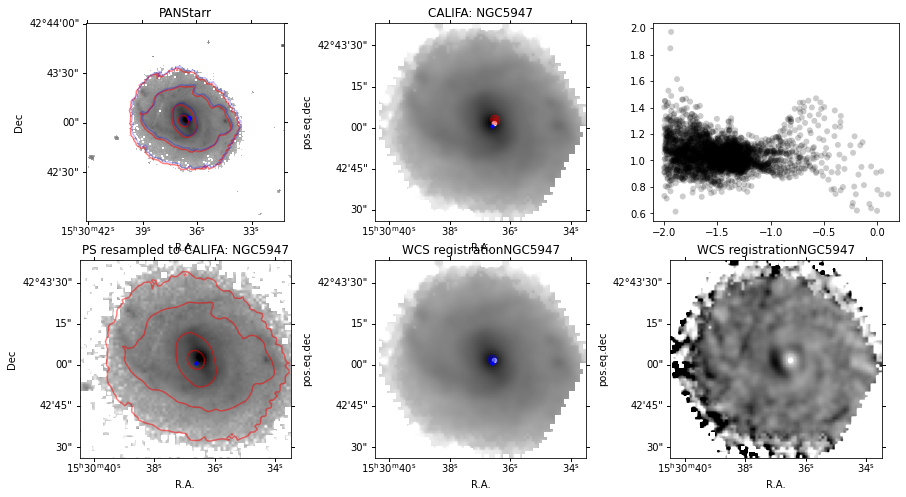

In [88]:
# CRVAL1_CR
def plot_name(name='NGC5947'):
    df_s=df_ast[df_ast['name']==name]

    plt.ion()
    plot_astr_warp(name=df_s['name'].values[0],ext='pdf', xc_PS=df_s['XC1'].to_numpy(dtype='float')[0],\
              yc_PS=df_s['YC1'].to_numpy(dtype='float')[0], \
                   RA_PS=df_s['CRVAL1_CR'].to_numpy(dtype='float')[0]
              , DEC_PS=df_s['CRVAL2_CR'].to_numpy(dtype='float')[0], \
                   xc_cal=df_s['XC'].to_numpy(dtype='float')[0]
              , yc_cal=df_s['YC'].to_numpy(dtype='float')[0])

plot_name(name="NGC5947")

In [17]:
ww = {'g': 4866, 'r': 6215, 'i': 7545, 'z': 8679, 'y': 9633}
print(ww['g'])

4866


CDELT_ORG = [-0.0001  0.0001]
IN=  232.65253810928584 42.71698679559577
Offsets ( 0 ):  x=  0.017578125 +- 0.095703125  y=  0.474609375 +- 0.111328125


<ipython-input-85-a59ab7367ee3>:225: RuntimeWarning: divide by zero encountered in log10
  ax2.imshow(np.log10(hdu.data), cmap='gray_r', vmin=-3, vmax=0.15, origin='lower')
<ipython-input-85-a59ab7367ee3>:225: RuntimeWarning: invalid value encountered in log10
  ax2.imshow(np.log10(hdu.data), cmap='gray_r', vmin=-3, vmax=0.15, origin='lower')
/home/sanchez/.local/lib/python3.8/site-packages/image_registration/fft_tools/zoom.py:101: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  outarr[ii] = outarr_d[dims]


Offsets ( 1 ):  x=  0.005859375 +- 0.091796875  y=  0.001953125 +- 0.1953125
Offsets ( 2 ):  x=  0.001953125 +- 0.08984375  y=  0.001953125 +- 0.193359375
Offsets ( 3 ):  x=  0.001953125 +- 0.087890625  y=  -0.001953125 +- 0.1953125
Offsets ( 4 ):  x=  -0.001953125 +- 0.177734375  y=  0.001953125 +- 0.1953125
OUT =  232.65254516223726 42.71685387458883


<ipython-input-85-a59ab7367ee3>:272: RuntimeWarning: divide by zero encountered in log10
  ax4.imshow(np.log10(hdu.data), cmap='gray_r', vmin=-3, vmax=0.25, origin='lower')
<ipython-input-85-a59ab7367ee3>:272: RuntimeWarning: invalid value encountered in log10
  ax4.imshow(np.log10(hdu.data), cmap='gray_r', vmin=-3, vmax=0.25, origin='lower')


photometric correction
pix_rat = 0.36000000000000004
rat = 0.7768000212140249+-0.2156692176245309


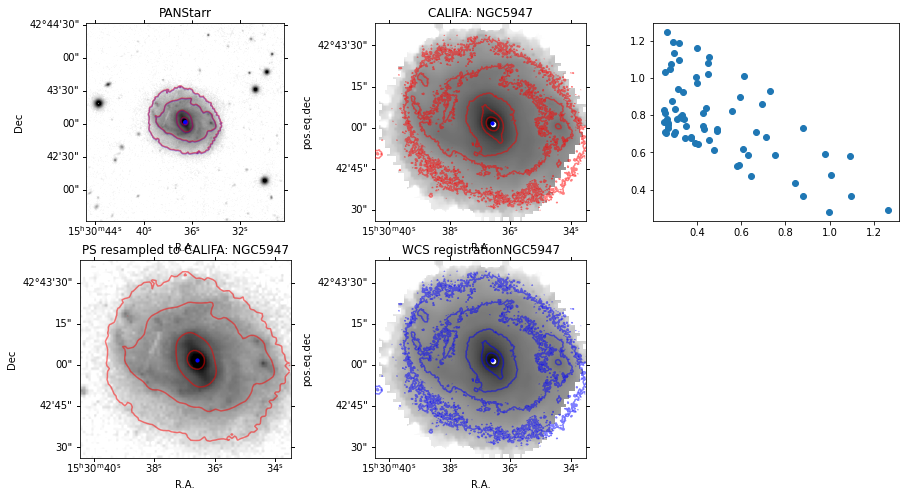

In [86]:
def plot_name(name='NGC5947'):
    df_s=df_ast[df_ast['name']==name]

    plt.ion()
    plot_astr_hips(name=df_s['name'].values[0],ext='pdf', xc_PS=df_s['XC1'].to_numpy(dtype='float')[0],
              yc_PS=df_s['YC1'].to_numpy(dtype='float')[0], RA_PS=df_s['RA_gal_arc'].to_numpy(dtype='float')[0]
              , DEC_PS=df_s['DEC_gal_arc'].to_numpy(dtype='float')[0], xc_cal=df_s['XC'].to_numpy(dtype='float')[0]
              , yc_cal=df_s['YC'].to_numpy(dtype='float')[0])

plot_name(name="NGC5947")

CDELT_ORG = [-0.0001  0.0001]
IN=  1.8162137792638653 27.708225971123206
Offsets ( 0 ):  x=  -0.244140625 +- 0.130859375  y=  0.826171875 +- 0.12109375


<ipython-input-85-a59ab7367ee3>:225: RuntimeWarning: divide by zero encountered in log10
  ax2.imshow(np.log10(hdu.data), cmap='gray_r', vmin=-3, vmax=0.15, origin='lower')
<ipython-input-85-a59ab7367ee3>:225: RuntimeWarning: invalid value encountered in log10
  ax2.imshow(np.log10(hdu.data), cmap='gray_r', vmin=-3, vmax=0.15, origin='lower')
/home/sanchez/.local/lib/python3.8/site-packages/image_registration/fft_tools/zoom.py:101: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  outarr[ii] = outarr_d[dims]


Offsets ( 1 ):  x=  -0.029296875 +- 0.1328125  y=  0.005859375 +- 0.119140625
Offsets ( 2 ):  x=  -0.005859375 +- 0.130859375  y=  -0.001953125 +- 0.12109375
Offsets ( 3 ):  x=  0.001953125 +- 0.1328125  y=  0.001953125 +- 0.119140625
Offsets ( 4 ):  x=  -0.001953125 +- 0.1328125  y=  -0.001953125 +- 0.12109375
OUT =  1.8161361967985874 27.70799539386626


<ipython-input-85-a59ab7367ee3>:272: RuntimeWarning: divide by zero encountered in log10
  ax4.imshow(np.log10(hdu.data), cmap='gray_r', vmin=-3, vmax=0.25, origin='lower')
<ipython-input-85-a59ab7367ee3>:272: RuntimeWarning: invalid value encountered in log10
  ax4.imshow(np.log10(hdu.data), cmap='gray_r', vmin=-3, vmax=0.25, origin='lower')


photometric correction
pix_rat = 0.36000000000000004
rat = 0.9318106789105225+-0.12015474615954075


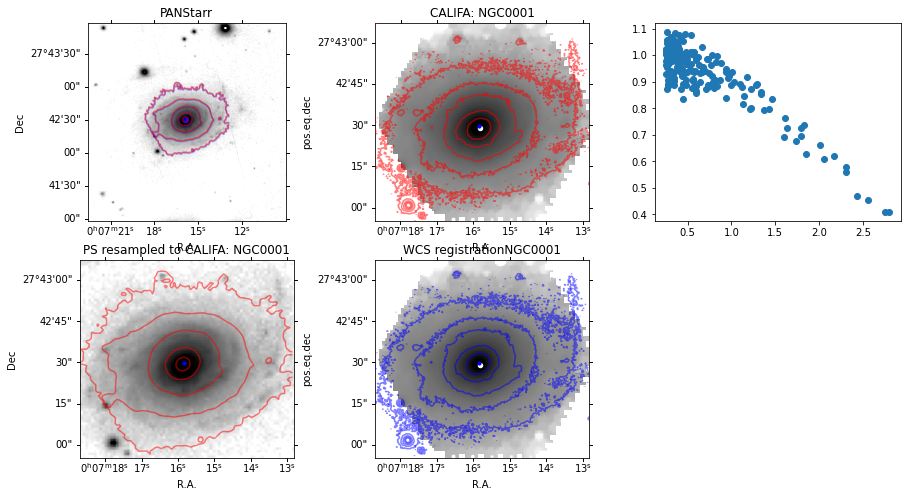

In [87]:
plot_name(name="NGC0001")

CDELT_ORG = [-0.0001  0.0001]
IN=  188.06519765151864 66.39957801130646
Offsets ( 0 ):  x=  -14.310546875 +- 0.15234375  y=  0.751953125 +- 0.115234375


<ipython-input-85-a59ab7367ee3>:225: RuntimeWarning: divide by zero encountered in log10
  ax2.imshow(np.log10(hdu.data), cmap='gray_r', vmin=-3, vmax=0.15, origin='lower')
<ipython-input-85-a59ab7367ee3>:225: RuntimeWarning: invalid value encountered in log10
  ax2.imshow(np.log10(hdu.data), cmap='gray_r', vmin=-3, vmax=0.15, origin='lower')
/home/sanchez/.local/lib/python3.8/site-packages/image_registration/fft_tools/zoom.py:101: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  outarr[ii] = outarr_d[dims]


Offsets ( 1 ):  x=  -8.560546875 +- 0.10546875  y=  0.205078125 +- 0.1171875
Offsets ( 2 ):  x=  -5.142578125 +- 0.154296875  y=  0.044921875 +- 0.083984375
Offsets ( 3 ):  x=  -3.076171875 +- 0.154296875  y=  0.013671875 +- 0.06640625
Offsets ( 4 ):  x=  -1.845703125 +- 0.154296875  y=  0.001953125 +- 0.125
OUT =  188.05604888849783 66.39929535071617


<ipython-input-85-a59ab7367ee3>:272: RuntimeWarning: divide by zero encountered in log10
  ax4.imshow(np.log10(hdu.data), cmap='gray_r', vmin=-3, vmax=0.25, origin='lower')
<ipython-input-85-a59ab7367ee3>:272: RuntimeWarning: invalid value encountered in log10
  ax4.imshow(np.log10(hdu.data), cmap='gray_r', vmin=-3, vmax=0.25, origin='lower')


photometric correction
pix_rat = 0.36000000000000004
rat = 3.413064846700262+-2.3026368377211814


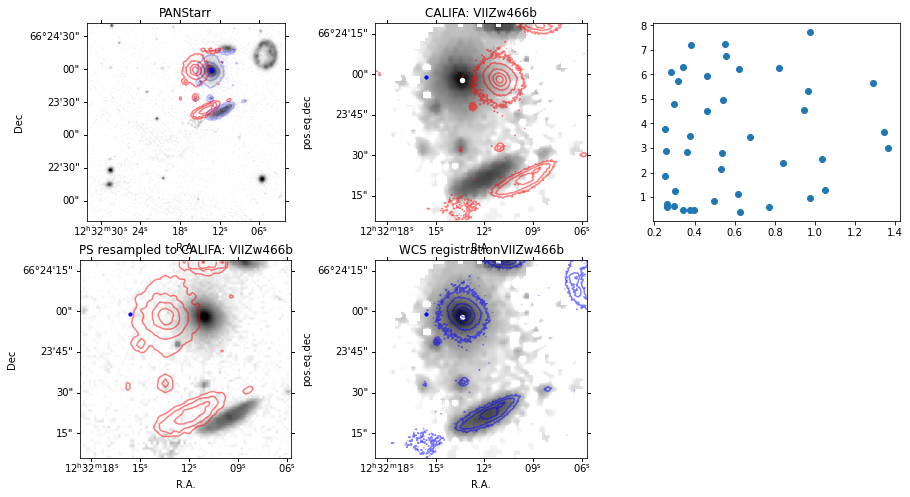

In [88]:
plot_name(name="VIIZw466b")

CDELT_ORG = [-0.0001  0.0001]
IN=  284.6700493773857 43.46836858414771
Offsets ( 0 ):  x=  -0.826171875 +- 0.015625  y=  0.572265625 +- 0.015625


<ipython-input-80-d361de48147b>:225: RuntimeWarning: divide by zero encountered in log10
  ax2.imshow(np.log10(hdu.data), cmap='gray_r', vmin=-3, vmax=0.15, origin='lower')
<ipython-input-80-d361de48147b>:225: RuntimeWarning: invalid value encountered in log10
  ax2.imshow(np.log10(hdu.data), cmap='gray_r', vmin=-3, vmax=0.15, origin='lower')
/home/sanchez/.local/lib/python3.8/site-packages/image_registration/fft_tools/zoom.py:101: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  outarr[ii] = outarr_d[dims]


Offsets ( 1 ):  x=  -0.181640625 +- 0.013671875  y=  -0.326171875 +- 0.01171875
Offsets ( 2 ):  x=  -0.123046875 +- 0.015625  y=  0.025390625 +- 0.015625
Offsets ( 3 ):  x=  -0.041015625 +- 0.017578125  y=  -0.029296875 +- 0.017578125
Offsets ( 4 ):  x=  0.009765625 +- 0.017578125  y=  0.041015625 +- 0.017578125
OUT =  284.669726569226 43.46828991661299


<ipython-input-80-d361de48147b>:272: RuntimeWarning: divide by zero encountered in log10
  ax4.imshow(np.log10(hdu.data), cmap='gray_r', vmin=-3, vmax=0.25, origin='lower')
<ipython-input-80-d361de48147b>:272: RuntimeWarning: invalid value encountered in log10
  ax4.imshow(np.log10(hdu.data), cmap='gray_r', vmin=-3, vmax=0.25, origin='lower')


photometric correction
pix_rat = 0.36000000000000004
rat = 6.802550392802512+-22.45191416254682


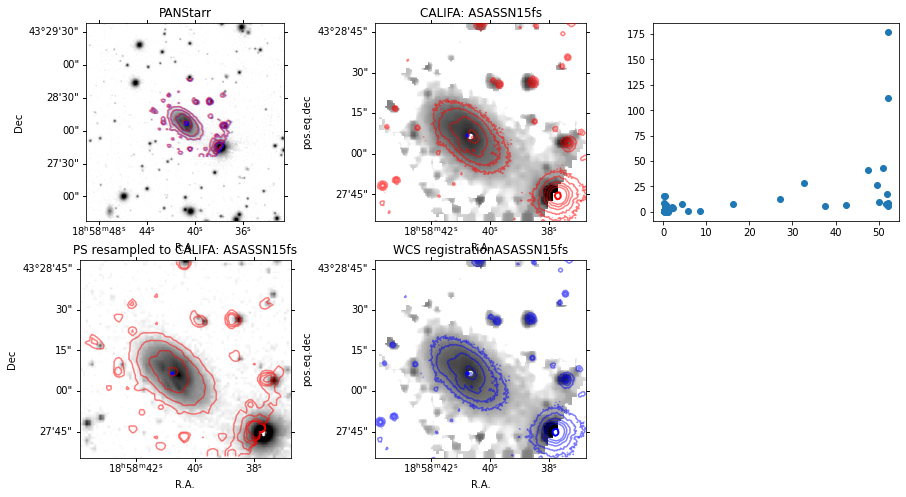

In [84]:
plot_name(name="ASASSN15fs")

In [10]:
df_s=df_ast[df_ast['name']=='ASASSN15fs']
plot_astr(name=df_s['name'].values[0],ext='pdf', xc_PS=df_s['XC.1'].to_numpy(dtype='float')[0],
          yc_PS=df_s['YC.1'].to_numpy(dtype='float')[0], RA_PS=df_s['RA_gal_arc'].to_numpy(dtype='float')[0]
          , DEC_PS=df_s['DEC_gal_arc'].to_numpy(dtype='float')[0], xc_cal=df_s['XC'].to_numpy(dtype='float')[0]
          , yc_cal=df_s['YC'].to_numpy(dtype='float')[0])


KeyboardInterrupt: 

In [ ]:
df_s=df_ast[df_ast['name']=='NGC7253B']
plot_astr(name=df_s['name'].values[0],ext='pdf', xc_PS=df_s['XC.1'].to_numpy(dtype='float')[0],
          yc_PS=df_s['YC.1'].to_numpy(dtype='float')[0], RA_PS=df_s['RA_gal_arc'].to_numpy(dtype='float')[0]
          , DEC_PS=df_s['DEC_gal_arc'].to_numpy(dtype='float')[0], xc_cal=df_s['XC'].to_numpy(dtype='float')[0]
          , yc_cal=df_s['YC'].to_numpy(dtype='float')[0])

stats SDSS=  0.05510816   0.9041262
IN=  120.85645274175867 10.050322536474875


/usr/lib/python3/dist-packages/ipykernel_launcher.py:358: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:358: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python3.7/dist-packages/image_registration-0.2.5.dev337-py3.7.egg/image_registration/fft_tools/zoom.py:101: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  outarr[ii] = outarr_d[dims]


Offsets ( 0 ):  x=  -0.173828125 +- 0.017578125  y=  0.986328125 +- 0.013671875
Offsets ( 1 ):  x=  0.111328125 +- 0.015625  y=  -0.033203125 +- 0.015625
Offsets ( 2 ):  x=  -0.056640625 +- 0.017578125  y=  0.009765625 +- 0.01171875
Offsets ( 3 ):  x=  0.044921875 +- 0.017578125  y=  0.001953125 +- 0.00390625
Offsets ( 4 ):  x=  -0.037109375 +- 0.017578125  y=  0.001953125 +- 0.005859375
OUT =  120.85642181727951 10.050053981787373


/usr/lib/python3/dist-packages/ipykernel_launcher.py:405: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:405: RuntimeWarning: invalid value encountered in log10


DONE


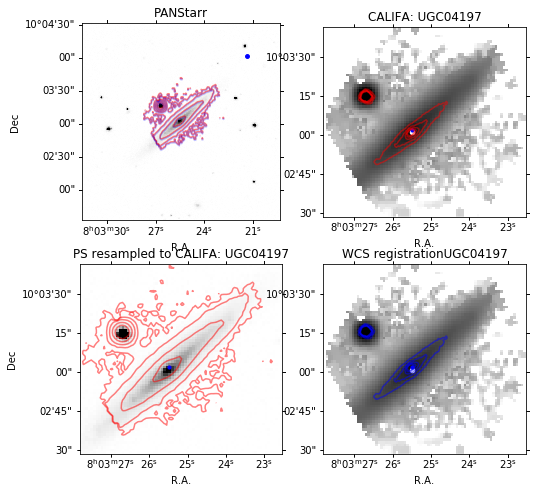

In [46]:

#%matplotlib inline
#%%capture
#%matplotlib nbagg
df_s=df_ast[df_ast['name']=='UGC04197']
plt.ion()
plot_astr(name=df_s['name'].values[0],ext='pdf', xc_PS=df_s['XC.1'].to_numpy(dtype='float')[0],
          yc_PS=df_s['YC.1'].to_numpy(dtype='float')[0], RA_PS=df_s['RA_gal_arc'].to_numpy(dtype='float')[0]
          , DEC_PS=df_s['DEC_gal_arc'].to_numpy(dtype='float')[0], xc_cal=df_s['XC'].to_numpy(dtype='float')[0]
          , yc_cal=df_s['YC'].to_numpy(dtype='float')[0])
print('DONE')

In [41]:
#plot_astr(ext='png')
#plot_astr_points(ext='png')


/usr/lib/python3/dist-packages/ipykernel_launcher.py:221: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:221: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python3.7/dist-packages/image_registration-0.2.5.dev337-py3.7.egg/image_registration/fft_tools/zoom.py:101: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  outarr[ii] = outarr_d[dims]


Offsets ( 0 ):  x=  -0.244140625 +- 0.130859375  y=  0.826171875 +- 0.12109375
Offsets ( 1 ):  x=  -0.029296875 +- 0.1328125  y=  0.005859375 +- 0.119140625
Offsets ( 2 ):  x=  -0.005859375 +- 0.130859375  y=  -0.001953125 +- 0.12109375
Offsets ( 3 ):  x=  0.001953125 +- 0.1328125  y=  0.001953125 +- 0.119140625
Offsets ( 4 ):  x=  -0.001953125 +- 0.1328125  y=  -0.001953125 +- 0.12109375


/usr/lib/python3/dist-packages/ipykernel_launcher.py:264: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:264: RuntimeWarning: invalid value encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in log10


NGC0001 246.974135143836 253.671056117009 1.81603449430832 27.7082601438207 37.6454258399635 33.1230217109724
[ 1.81583191 27.70779304]
[250. 250.]


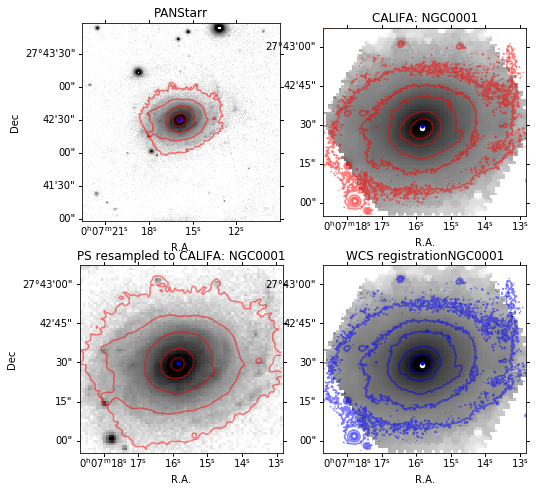

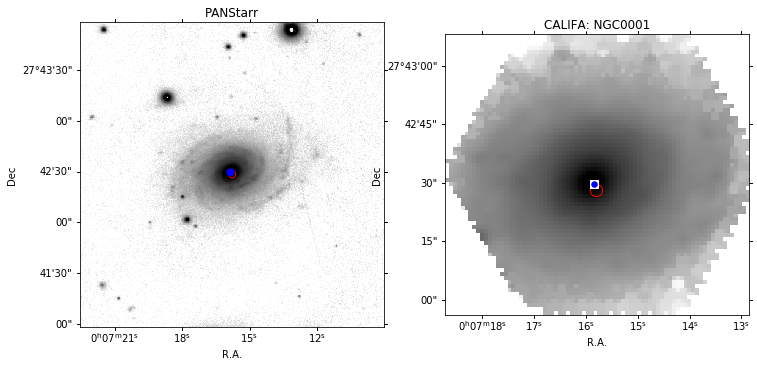

In [139]:

#df_ast['

df_s=df_ast[df_ast['name']=='NGC0001']
plot_astr(name=df_s['name'].values[0],ext='pdf', xc_PS=df_s['XC.1'].to_numpy(dtype='float')[0],
          yc_PS=df_s['YC.1'].to_numpy(dtype='float')[0], RA_PS=df_s['RA_gal_arc'].to_numpy(dtype='float')[0]
          , DEC_PS=df_s['DEC_gal_arc'].to_numpy(dtype='float')[0], xc_cal=df_s['XC'].to_numpy(dtype='float')[0]
          , yc_cal=df_s['YC'].to_numpy(dtype='float')[0])

df_s=df_ast[df_ast['name']=='NGC0001']
plot_astr_points(name=df_s['name'].values[0],ext='pdf', xc_PS=df_s['XC.1'].to_numpy(dtype='float')[0],
          yc_PS=df_s['YC.1'].to_numpy(dtype='float')[0], RA_PS=df_s['RA_gal_arc'].to_numpy(dtype='float')[0]
          , DEC_PS=df_s['DEC_gal_arc'].to_numpy(dtype='float')[0], xc_cal=df_s['XC'].to_numpy(dtype='float')[0]
          , yc_cal=df_s['YC'].to_numpy(dtype='float')[0])



/usr/lib/python3/dist-packages/ipykernel_launcher.py:221: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:221: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python3.7/dist-packages/image_registration-0.2.5.dev337-py3.7.egg/image_registration/fft_tools/zoom.py:101: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  outarr[ii] = outarr_d[dims]


Offsets ( 0 ):  x=  -0.310546875 +- 0.107421875  y=  0.490234375 +- 0.072265625
Offsets ( 1 ):  x=  -0.005859375 +- 0.107421875  y=  0.009765625 +- 0.138671875
Offsets ( 2 ):  x=  0.001953125 +- 0.109375  y=  -0.001953125 +- 0.13671875
Offsets ( 3 ):  x=  -0.001953125 +- 0.107421875  y=  0.001953125 +- 0.138671875
Offsets ( 4 ):  x=  0.001953125 +- 0.109375  y=  -0.001953125 +- 0.13671875


/usr/lib/python3/dist-packages/ipykernel_launcher.py:264: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:264: RuntimeWarning: invalid value encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:221: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:221: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python3.7/dist-packages/image_registration-0.2.5.dev337-py3.7.egg/image_registration/fft_tools/zoom.py:101: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  outarr[ii] = outarr_d[dims]


Offsets ( 0 ):  x=  0.154296875 +- 0.08203125  y=  0.751953125 +- 0.0625
Offsets ( 1 ):  x=  0.302734375 +- 0.07421875  y=  0.099609375 +- 0.09375
Offsets ( 2 ):  x=  -1.001953125 +- 0.06640625  y=  0.041015625 +- 0.060546875
Offsets ( 3 ):  x=  -0.029296875 +- 0.0625  y=  0.001953125 +- 0.029296875
Offsets ( 4 ):  x=  -0.033203125 +- 0.0625  y=  0.001953125 +- 0.021484375


/usr/lib/python3/dist-packages/ipykernel_launcher.py:264: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:264: RuntimeWarning: invalid value encountered in log10


(119.84220960103814, 18.110109212153667, 35, 34)

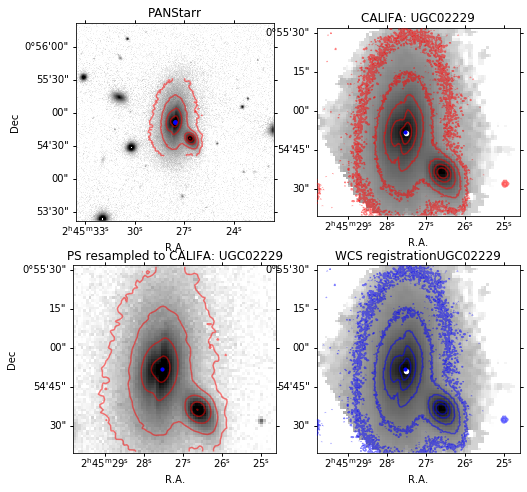

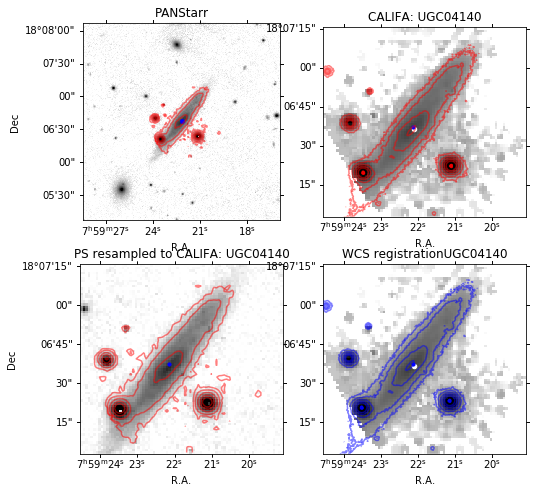

In [140]:
#UGC02229

df_s=df_ast[df_ast['name']=='UGC02229']
plot_astr(name=df_s['name'].values[0],ext='pdf', xc_PS=df_s['XC.1'].to_numpy(dtype='float')[0],
          yc_PS=df_s['YC.1'].to_numpy(dtype='float')[0], RA_PS=df_s['RA_gal_arc'].to_numpy(dtype='float')[0]
          , DEC_PS=df_s['DEC_gal_arc'].to_numpy(dtype='float')[0], xc_cal=df_s['XC'].to_numpy(dtype='float')[0]
          , yc_cal=df_s['YC'].to_numpy(dtype='float')[0])

# UGC04140

df_s=df_ast[df_ast['name']=='UGC04140']
plot_astr(name=df_s['name'].values[0],ext='pdf', xc_PS=df_s['XC.1'].to_numpy(dtype='float')[0],
          yc_PS=df_s['YC.1'].to_numpy(dtype='float')[0], RA_PS=df_s['RA_gal_arc'].to_numpy(dtype='float')[0]
          , DEC_PS=df_s['DEC_gal_arc'].to_numpy(dtype='float')[0], xc_cal=df_s['XC'].to_numpy(dtype='float')[0]
          , yc_cal=df_s['YC'].to_numpy(dtype='float')[0])



/usr/lib/python3/dist-packages/ipykernel_launcher.py:221: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:221: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python3.7/dist-packages/image_registration-0.2.5.dev337-py3.7.egg/image_registration/fft_tools/zoom.py:101: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  outarr[ii] = outarr_d[dims]


Offsets ( 0 ):  x=  -7.900390625 +- 0.203125  y=  0.744140625 +- 0.154296875
Offsets ( 1 ):  x=  -1.025390625 +- 0.201171875  y=  0.001953125 +- 0.078125
Offsets ( 2 ):  x=  -0.126953125 +- 0.201171875  y=  0.001953125 +- 0.080078125
Offsets ( 3 ):  x=  -0.017578125 +- 0.19921875  y=  0.001953125 +- 0.076171875
Offsets ( 4 ):  x=  -0.001953125 +- 0.19921875  y=  0.001953125 +- 0.07421875


/usr/lib/python3/dist-packages/ipykernel_launcher.py:264: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:264: RuntimeWarning: invalid value encountered in log10


(334.8602625112215, 29.39764379870132, 25, 30)

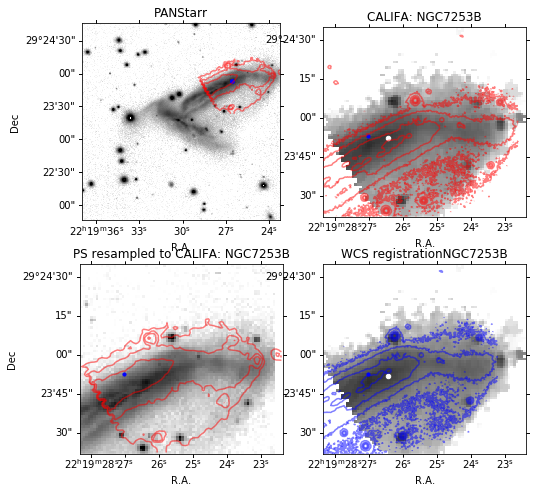

In [141]:
df_s=df_ast[df_ast['name']=='NGC7253B']
plot_astr(name=df_s['name'].values[0],ext='pdf', xc_PS=df_s['XC.1'].to_numpy(dtype='float')[0],
          yc_PS=df_s['YC.1'].to_numpy(dtype='float')[0], RA_PS=df_s['RA_gal_arc'].to_numpy(dtype='float')[0]
          , DEC_PS=df_s['DEC_gal_arc'].to_numpy(dtype='float')[0], xc_cal=df_s['XC'].to_numpy(dtype='float')[0]
          , yc_cal=df_s['YC'].to_numpy(dtype='float')[0])




/usr/lib/python3/dist-packages/ipykernel_launcher.py:221: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:221: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python3.7/dist-packages/image_registration-0.2.5.dev337-py3.7.egg/image_registration/fft_tools/zoom.py:101: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  outarr[ii] = outarr_d[dims]


Offsets ( 0 ):  x=  0.767578125 +- 0.244140625  y=  0.943359375 +- 0.283203125
Offsets ( 1 ):  x=  0.060546875 +- 0.15234375  y=  0.009765625 +- 0.28125
Offsets ( 2 ):  x=  0.001953125 +- 0.123046875  y=  -0.001953125 +- 0.283203125
Offsets ( 3 ):  x=  0.001953125 +- 0.12109375  y=  -0.001953125 +- 0.283203125
Offsets ( 4 ):  x=  -0.001953125 +- 0.24609375  y=  0.001953125 +- 0.283203125


/usr/lib/python3/dist-packages/ipykernel_launcher.py:264: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:264: RuntimeWarning: invalid value encountered in log10


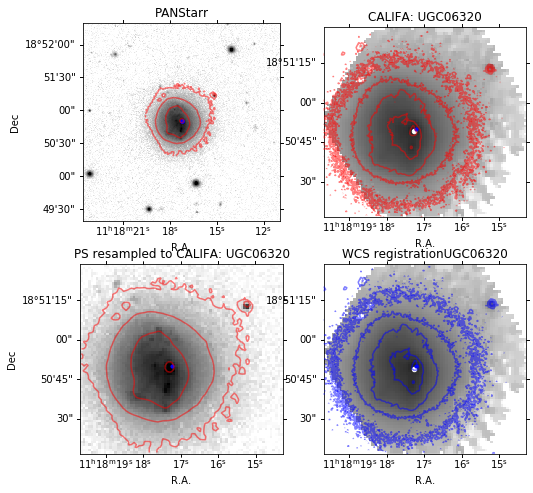

In [142]:
#%%capture
#%matplotlib nbagg

plot_name(name="UGC06320")


/usr/lib/python3/dist-packages/ipykernel_launcher.py:221: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:221: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python3.7/dist-packages/image_registration-0.2.5.dev337-py3.7.egg/image_registration/fft_tools/zoom.py:101: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  outarr[ii] = outarr_d[dims]


Offsets ( 0 ):  x=  -0.884765625 +- 0.099609375  y=  -0.220703125 +- 0.103515625
Offsets ( 1 ):  x=  0.001953125 +- 0.046875  y=  -0.001953125 +- 0.1015625
Offsets ( 2 ):  x=  0.001953125 +- 0.044921875  y=  0.001953125 +- 0.1015625
Offsets ( 3 ):  x=  -0.009765625 +- 0.099609375  y=  -0.001953125 +- 0.1015625
Offsets ( 4 ):  x=  0.001953125 +- 0.048828125  y=  0.001953125 +- 0.1015625


/usr/lib/python3/dist-packages/ipykernel_launcher.py:264: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:264: RuntimeWarning: invalid value encountered in log10


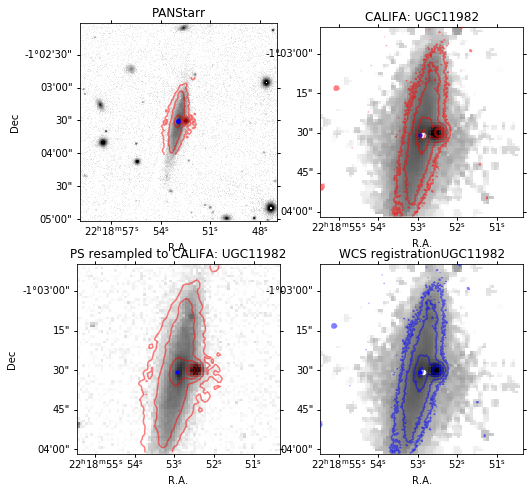

In [143]:
plot_name(name="UGC11982")

/usr/lib/python3/dist-packages/ipykernel_launcher.py:221: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/image_registration-0.2.5.dev337-py3.7.egg/image_registration/fft_tools/zoom.py:101: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  outarr[ii] = outarr_d[dims]


Offsets ( 0 ):  x=  -0.779296875 +- 0.0390625  y=  0.318359375 +- 0.060546875
Offsets ( 1 ):  x=  -0.349609375 +- 0.041015625  y=  0.080078125 +- 0.06640625
Offsets ( 2 ):  x=  0.083984375 +- 0.041015625  y=  0.103515625 +- 0.07421875
Offsets ( 3 ):  x=  -0.107421875 +- 0.04296875  y=  0.009765625 +- 0.044921875
Offsets ( 4 ):  x=  0.095703125 +- 0.041015625  y=  0.017578125 +- 0.07421875


/usr/lib/python3/dist-packages/ipykernel_launcher.py:264: RuntimeWarning: divide by zero encountered in log10


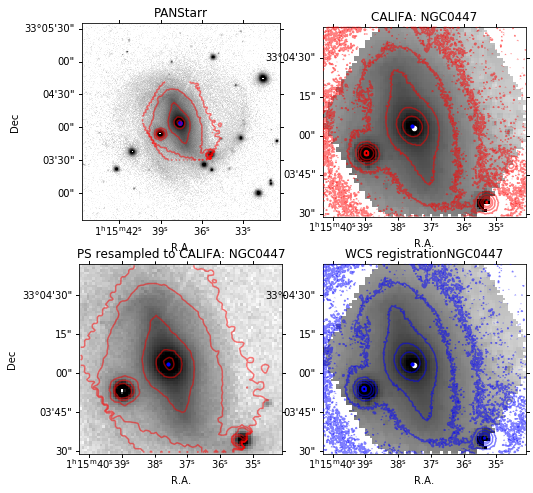

In [144]:
plot_name(name="NGC0447")

/usr/lib/python3/dist-packages/ipykernel_launcher.py:221: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:221: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python3.7/dist-packages/image_registration-0.2.5.dev337-py3.7.egg/image_registration/fft_tools/zoom.py:101: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  outarr[ii] = outarr_d[dims]


Offsets ( 0 ):  x=  0.412109375 +- 0.134765625  y=  0.283203125 +- 0.12890625
Offsets ( 1 ):  x=  0.103515625 +- 0.1171875  y=  0.044921875 +- 0.126953125
Offsets ( 2 ):  x=  0.021484375 +- 0.078125  y=  0.005859375 +- 0.12890625
Offsets ( 3 ):  x=  0.005859375 +- 0.0703125  y=  0.001953125 +- 0.12890625
Offsets ( 4 ):  x=  0.001953125 +- 0.068359375  y=  -0.001953125 +- 0.126953125


/usr/lib/python3/dist-packages/ipykernel_launcher.py:264: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:264: RuntimeWarning: invalid value encountered in log10


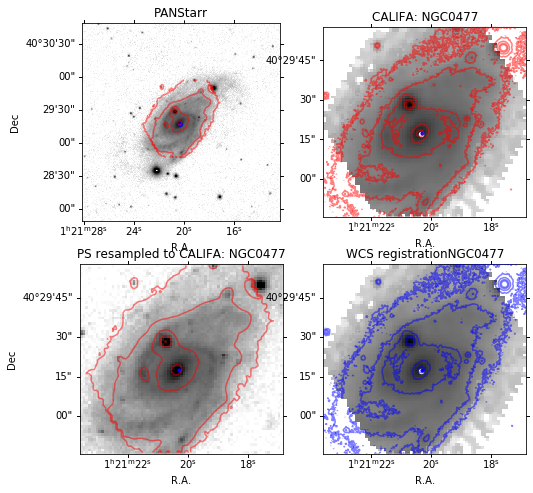

In [145]:
plot_name(name="NGC0477")

/usr/lib/python3/dist-packages/ipykernel_launcher.py:221: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:221: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python3.7/dist-packages/image_registration-0.2.5.dev337-py3.7.egg/image_registration/fft_tools/zoom.py:101: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  outarr[ii] = outarr_d[dims]


Offsets ( 0 ):  x=  -14.310546875 +- 0.15234375  y=  0.751953125 +- 0.115234375
Offsets ( 1 ):  x=  -8.560546875 +- 0.10546875  y=  0.205078125 +- 0.1171875
Offsets ( 2 ):  x=  -5.142578125 +- 0.154296875  y=  0.044921875 +- 0.083984375
Offsets ( 3 ):  x=  -3.076171875 +- 0.154296875  y=  0.013671875 +- 0.06640625
Offsets ( 4 ):  x=  -1.845703125 +- 0.154296875  y=  0.001953125 +- 0.125


/usr/lib/python3/dist-packages/ipykernel_launcher.py:264: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:264: RuntimeWarning: invalid value encountered in log10


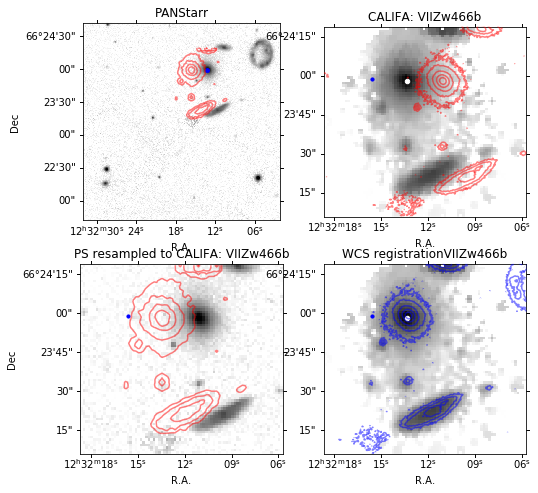

In [146]:
plot_name(name="VIIZw466b")

/usr/lib/python3/dist-packages/ipykernel_launcher.py:221: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:221: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python3.7/dist-packages/image_registration-0.2.5.dev337-py3.7.egg/image_registration/fft_tools/zoom.py:101: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  outarr[ii] = outarr_d[dims]


Offsets ( 0 ):  x=  27.462890625 +- 0.240234375  y=  8.857421875 +- 0.888671875
Offsets ( 1 ):  x=  17.48828125 +- 0.44921875  y=  0.43359375 +- 0.8125
Offsets ( 2 ):  x=  9.794921875 +- 0.546875  y=  8.986328125 +- 0.8515625
Offsets ( 3 ):  x=  5.884765625 +- 0.521484375  y=  0.064453125 +- 0.810546875
Offsets ( 4 ):  x=  3.576171875 +- 0.5234375  y=  -0.119140625 +- 0.73828125


/usr/lib/python3/dist-packages/ipykernel_launcher.py:264: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:264: RuntimeWarning: invalid value encountered in log10


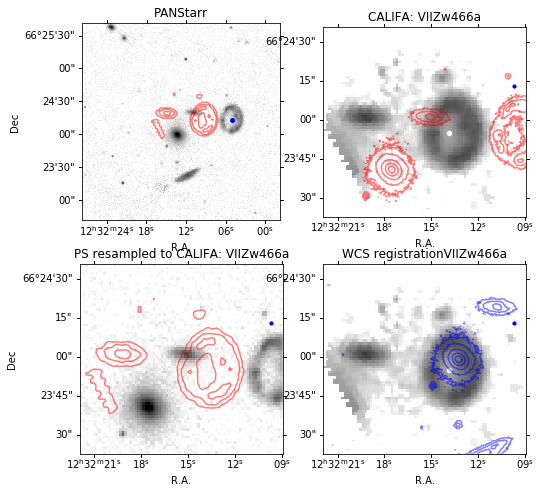

In [147]:
plot_name(name="VIIZw466a")

/usr/lib/python3/dist-packages/ipykernel_launcher.py:221: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:221: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python3.7/dist-packages/image_registration-0.2.5.dev337-py3.7.egg/image_registration/fft_tools/zoom.py:101: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  outarr[ii] = outarr_d[dims]


Offsets ( 0 ):  x=  6.580078125 +- 0.22265625  y=  -5.400390625 +- 0.205078125
Offsets ( 1 ):  x=  3.982421875 +- 0.22265625  y=  0.021484375 +- 0.11328125
Offsets ( 2 ):  x=  2.376953125 +- 0.171875  y=  -0.005859375 +- 0.205078125
Offsets ( 3 ):  x=  1.431640625 +- 0.146484375  y=  -0.001953125 +- 0.205078125
Offsets ( 4 ):  x=  0.873046875 +- 0.22265625  y=  0.001953125 +- 0.103515625


/usr/lib/python3/dist-packages/ipykernel_launcher.py:264: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:264: RuntimeWarning: invalid value encountered in log10


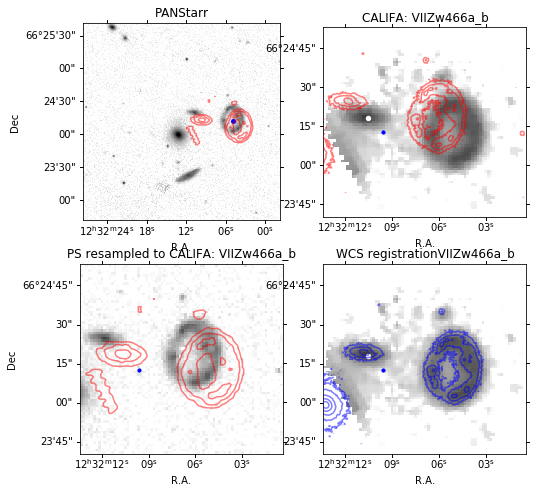

In [148]:
plot_name(name="VIIZw466a_b")

/usr/lib/python3/dist-packages/ipykernel_launcher.py:221: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:221: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python3.7/dist-packages/image_registration-0.2.5.dev337-py3.7.egg/image_registration/fft_tools/zoom.py:101: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  outarr[ii] = outarr_d[dims]


Offsets ( 0 ):  x=  -0.337890625 +- 0.189453125  y=  0.216796875 +- 0.08984375
Offsets ( 1 ):  x=  0.056640625 +- 0.1953125  y=  0.173828125 +- 0.091796875
Offsets ( 2 ):  x=  0.044921875 +- 0.19921875  y=  0.138671875 +- 0.095703125
Offsets ( 3 ):  x=  0.048828125 +- 0.203125  y=  0.119140625 +- 0.095703125
Offsets ( 4 ):  x=  0.044921875 +- 0.20703125  y=  0.095703125 +- 0.09765625


/usr/lib/python3/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: invalid value encountered in log10


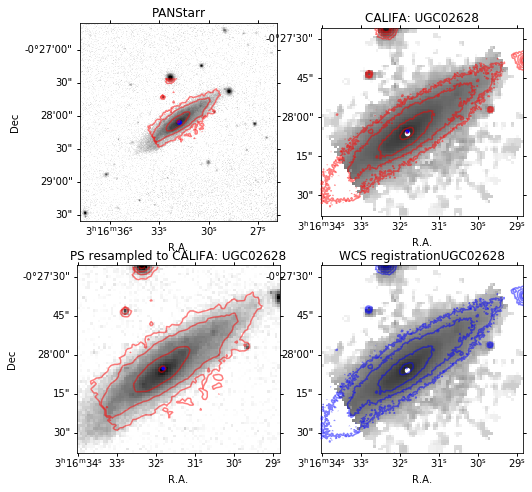

In [132]:
plot_name(name="UGC02628")

In [38]:
#%%capture
plt.ioff()
for index, df_s in df_ast.iterrows():
    if (df_s['name'] != "name"):
#        plot_astr(name=df_s['name'],ext='pdf', xc_PS=np.float(df_s['XC.1']),
#                  yc_PS=np.float(df_s['YC.1']), RA_PS=np.float(df_s['RA_gal_arc'])
#                  , DEC_PS=np.float(df_s['DEC_gal_arc']), xc_cal=np.float(df_s['XC'])
#                  , yc_cal=np.float(df_s['YC']))
        print(df_s['name'],df_s['XC'])

11fe 41.9707033667379
14J 26.9950786077457
2MASSXJ22532475 40.6070865740119
2MASXJ01331766+1319567 31.8648679791437
2MASXJ08374557 35.5237185008089
2MASXJ09065870 33.9289423378659
2MASXJ09591230 33.4722784594594
2MASXJ12095669 35.5030692748162
2MASXJ15024995+4847010-2 35.5199008018287
2MASXJ15024995+4847010_comb 35.51990079594
2MASXJ15024995+4847010 35.5109251790983
2MASXJ15393305+3205382-2 34.5457586814252
2MASXJ15393305+3205382_comb 34.5457456507532
2MASXJ15393305+3205382 34.5502559519957
2MASXJ15570268+3725001 34.5339048195292
2MASXJ16152860 34.5969512964298
2 9.90484095563429
ARP118 38.2544614616268
Arp141_b 42.971737197466
Arp141 41.5680661986981
Arp142 27.735634567493
Arp143 34.5213041100303
Arp148 26.1321072826107
ARP180 32.3112148453028
ARP220 37.9057315955424
Arp70 39.599204788024
ASAS14my 39.7463431534366
ASAS15cb 31.7954642723008
ASAS15cd 31.5225033133788
ASAS15db 31.53883320005
ASAS15dd 35.5172770706775
ASASSN-14in 34.6624985753047
ASASSN15fj 36.5633077406841
ASASSN-15fs 35

NGC6261 33.5671962873394
NGC6264 33.4628787763693
NGC6278 35.2206351366545
NGC6285 37.1097592250341
NGC6286 35.1384054634593
NGC6301 35.7989091464384
NGC6310 38.3154819646511
NGC6314 32.0308097661245
NGC6323 33.5179242778035
NGC6338 37.865290581231
NGC6361 35.9136638998391
NGC6373 35.7026013618873
NGC6394 37.4377887801363
NGC6411 38.6715387929986
NGC6427 36.7246113376063
NGC6478 37.5834864899876
NGC6497 38.1892752807826
NGC6515 36.4316847619488
NGC6762 38.8579281123844
NGC6786 39.4369898168218
NGC6789 33.3637950160215
NGC6941 35.3900803396788
NGC6945 36.3107192450024
NGC6946P1 33.4033085508304
NGC6946P2 58.2291414474336
NGC6946P3 32.7770444622388
NGC6946P4 23.2952789167323
NGC6946P5 23.4321441702504
NGC6946P6 25.8371759006971
NGC6962 35.5442969828132
NGC6977 35.3900864664147
NGC6978 36.2314331007456
NGC7025 36.5349238577682
NGC7047 34.8361350968804
NGC7052 34.5042715352823
NGC7194 36.5861920468285
NGC7236 35.2846537580541
NGC7253AF1 58.3336564311867
NGC7253AF2 46.231478403971
NGC7253B2